<a href="https://colab.research.google.com/github/Alexis3004/estadistica/blob/master/estadistica_ultimo_corte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**TRABAJO SERIES DE TIEMPO - ESTADÍSTICA NO PARAMÉTRICA - TEORÍA DE LA DECISIÓN - DISEÑO DE EXPERIMENTOS**</center>



<table style="margin:auto;"> 
<caption>Integrantes</caption>
<tr>
<td>Nelson Alexis Cáceres Carreño</td>
<td>2171763</td>
</tr>
<tr>
<td>Jenny Marcela Santamaría Rincón</td>
<td>2171455</td>
</tr>
<tr>
<td>Fredy Alejandro Mendoza López</td>
<td>2170116</td>
</tr>

##Librerías utilizadas

In [ ]:
library(devtools)

Loading required package: usethis



In [ ]:
install.packages('forecast')
install.packages('coin')
install.packages('plyr')
install.packages('samplingbook')
install_github('DFJL/samplingUtil')
install.packages("magrittr")
install.packages("dplyr")

In [ ]:
library(forecast)
library(readr)
library(plyr)
library(samplingbook) # llamamos la librería
library(SamplingUtil)
library(magrittr) # Permite leer la funcion %>% que se usa para asignar funciones a objetos
library(dplyr) # Contiene la funcion select
library(coin)
library(tidyverse)

##**SERIES DE TIEMPO**

<p align="justify">Use los datos de COVID-19 en Colombia para hacer el análisis de series de tiempo.
Compare los casos mediante Fecha de Notificación, Fecha de Diagnóstico y Fecha de reporte web.</p>

###Tratamiento

In [169]:
covid_19 <- read_csv("https://www.dropbox.com/s/u8qatnxiktj24vk/Casos_positivos_de_COVID-19_en_Colombia.csv?dl=1")

Parsed with column specification:
cols(
  .default = col_character(),
  `ID de caso` = col_double(),
  `Fecha de notificación` = col_datetime(format = ""),
  Edad = col_double(),
  `Fecha de muerte` = col_datetime(format = ""),
  `Fecha diagnostico` = col_datetime(format = ""),
  `Fecha recuperado` = col_datetime(format = ""),
  `fecha reporte web` = col_datetime(format = ""),
  `Codigo departamento` = col_double(),
  `Codigo pais` = col_double()
)

See spec(...) for full column specifications.



In [170]:
head(covid_19)

ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,⋯,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,⋯,2020-02-27T00:00:00.000,NA,2020-03-06,2020-03-13,2020-03-06,PCR,11,380,Otro,NA
2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,⋯,2020-03-04T00:00:00.000,NA,2020-03-09,2020-03-19,2020-03-09,PCR,76,724,Otro,NA
3,2020-03-07,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,⋯,2020-02-29T00:00:00.000,NA,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,Otro,NA
4,2020-03-09,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,⋯,2020-03-06T00:00:00.000,NA,2020-03-11,2020-03-26,2020-03-11,PCR,5,NA,Otro,NA
5,2020-03-09,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,⋯,2020-03-08T00:00:00.000,NA,2020-03-11,2020-03-23,2020-03-11,PCR,5,NA,Otro,NA
6,2020-03-10,05360,Itagüí,Antioquia,Recuperado,27,F,Relacionado,Leve,⋯,2020-03-06T00:00:00.000,NA,2020-03-11,2020-03-26,2020-03-11,PCR,5,NA,Otro,NA


convertimos la característica 'Fecha diagnostico', 'Fecha de notificación' y 'fecha reporte web' a tipo date para poder realizar la serie de tiempo

In [171]:
covid_19 <- covid_19[is.na(covid_19$`Fecha diagnostico`)==FALSE & is.na(covid_19$`Fecha de notificación`)==FALSE & is.na(covid_19$`fecha reporte web`)==FALSE,]

In [172]:
covid_19$`Fecha diagnostico` <- as.Date(covid_19$`Fecha diagnostico`)
covid_19$`Fecha de notificación` <- as.Date(covid_19$`Fecha de notificación`)
covid_19$`fecha reporte web` <- as.Date(covid_19$`fecha reporte web`)

Creamos un dataframe para cada tipo de fecha, este dataset tendrá en una de sus columnas las diferentes fechas que se presentan y en la otra columna la frecuencia con la cual se presentan dichas fechas 

In [173]:
casos_FD <- with(covid_19[covid_19$`Fecha diagnostico`<='2020-08-22',],data.frame(table(`Fecha diagnostico`)))
casos_FN <- with(covid_19[covid_19$`Fecha de notificación`<='2020-08-22',],data.frame(table(`Fecha de notificación`)))
casos_FW <- with(covid_19[covid_19$`fecha reporte web`<='2020-08-22',],data.frame(table(`fecha reporte web`)))

In [174]:
tail(casos_FD)

,Fecha.diagnostico,Freq
,<fct>,<int>
162,2020-08-17,9841
163,2020-08-18,7056
164,2020-08-19,12966
165,2020-08-20,11585
166,2020-08-21,9435
167,2020-08-22,7919


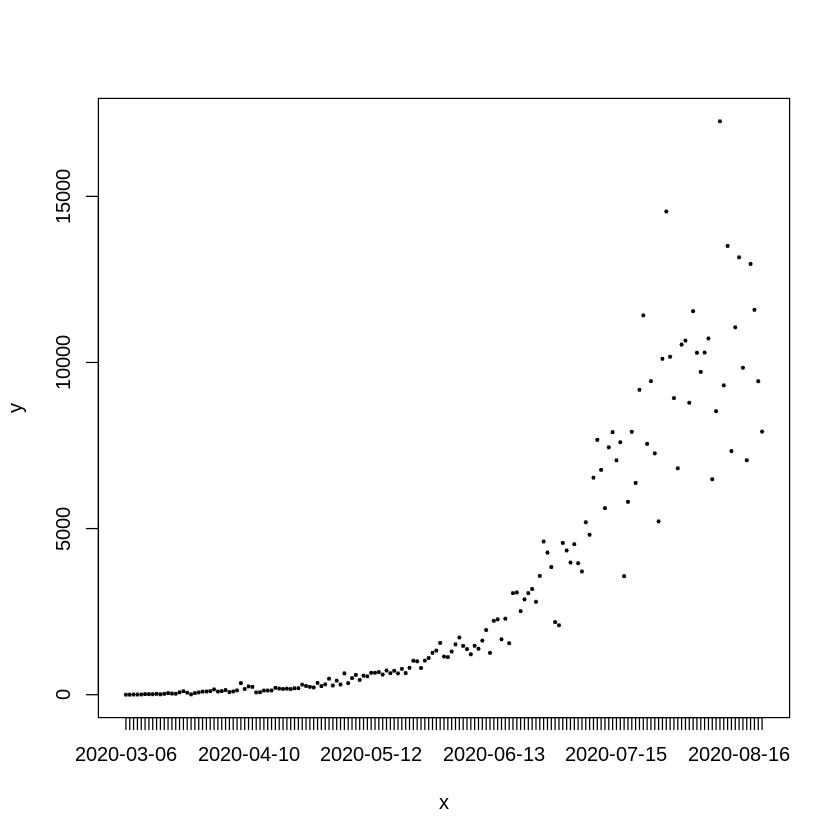

In [175]:
with(casos_FD, plot(Fecha.diagnostico, Freq))

Analizando la gráfica anterior podemos decir que la frecuencia con la cúal se diagnostican pacientes con covid-19 ha ido en aumento 

In [176]:
tail(casos_FN)

,Fecha.de.notificación,Freq
,<fct>,<int>
166,2020-08-17,3497
167,2020-08-18,6345
168,2020-08-19,5548
169,2020-08-20,4088
170,2020-08-21,3106
171,2020-08-22,1257


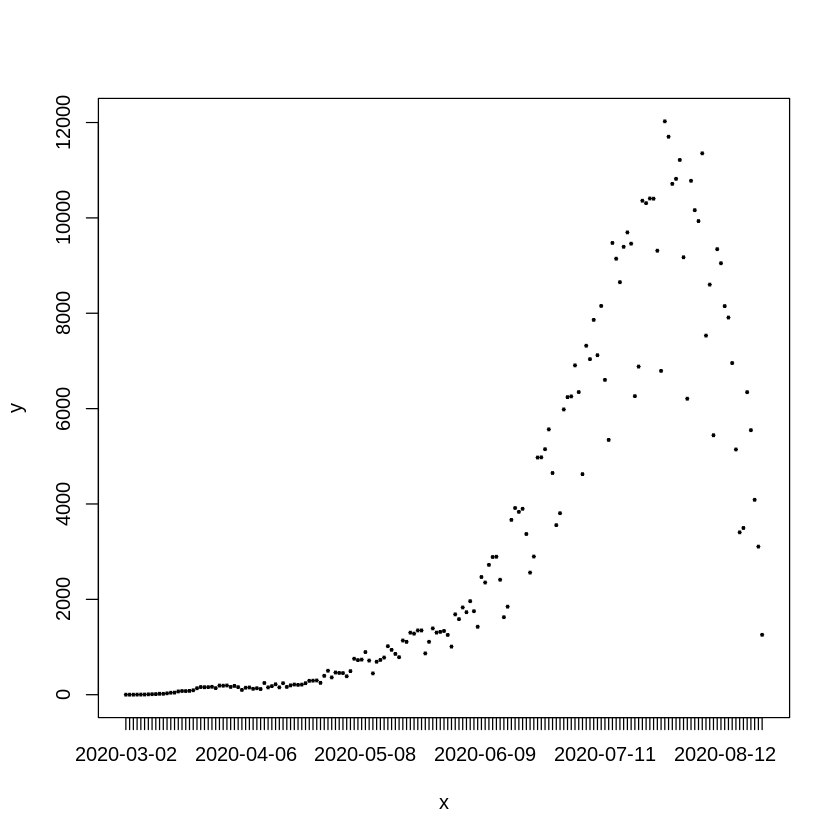

In [177]:
with(casos_FN, plot(Fecha.de.notificación, Freq))

Viendo la gráfica anterior, podemos decir que en algún momento se llegó a un punto donde se notificaron los casos con mayor frecuencia, sin embargo, vemos que hay un decenso, es decir, los casos se notifican con menos frecuencia en los últimos dias

In [178]:
tail(casos_FW)

,fecha.reporte.web,Freq
,<fct>,<int>
162,2020-08-17,8328
163,2020-08-18,12462
164,2020-08-19,13056
165,2020-08-20,11541
166,2020-08-21,8419
167,2020-08-22,10965


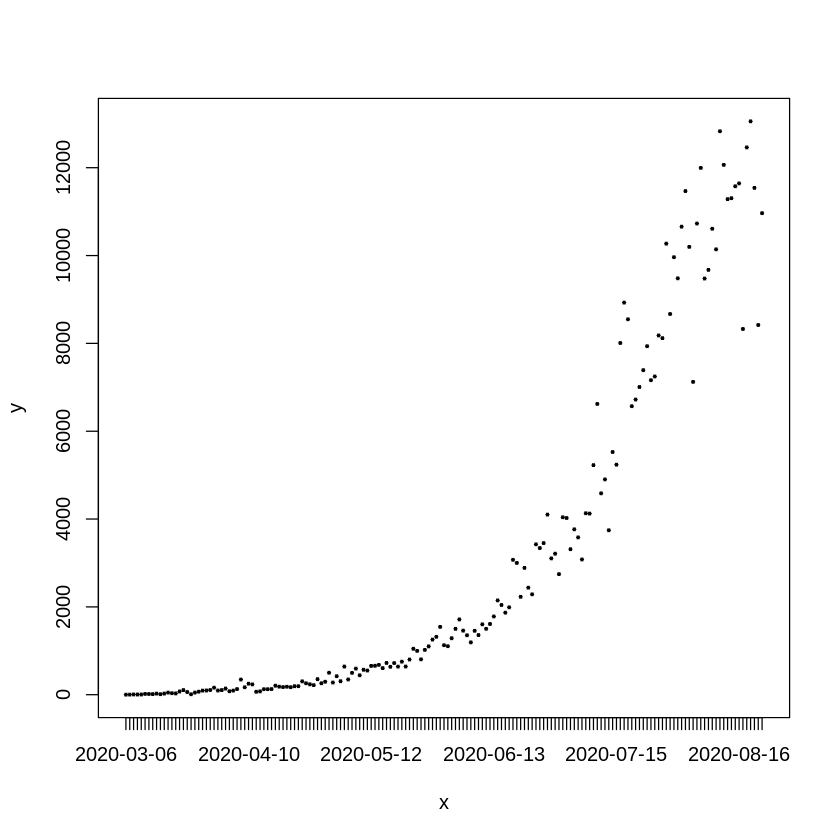

In [179]:
with(casos_FW, plot(fecha.reporte.web, Freq))

Analizando la gráfica para los reportes en la web, podemos identificar que la frecuencia ha ido aumentando a traves del tiempo, al igual que los diagnosticos

A continuación procedemos a guardar las frecuencias de las diferentes fechas

In [180]:
casosFD <- casos_FD$Freq
casosFN <- casos_FN$Freq
casosFW <- casos_FW$Freq

Creamos una serie de tiempo para cada tipo de fecha con estacionalidad semanal

In [181]:
casosFD.ts1<-ts(casosFD[-1], frequency = 7)
casosFN.ts1<-ts(casosFN[-1], frequency = 7)
casosFW.ts1<-ts(casosFW[-1], frequency = 7)


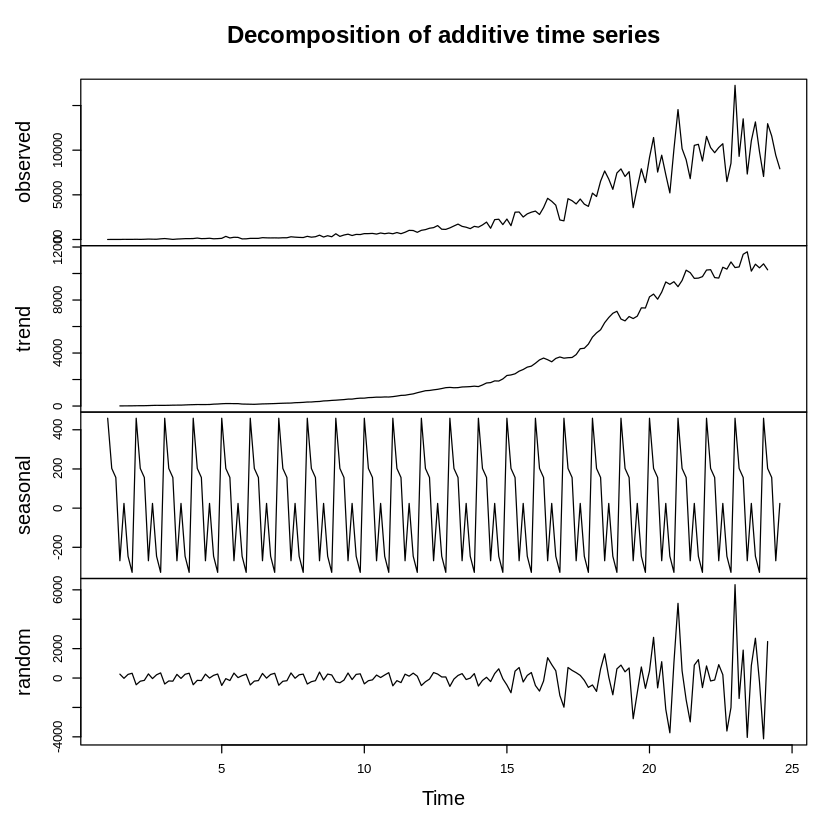

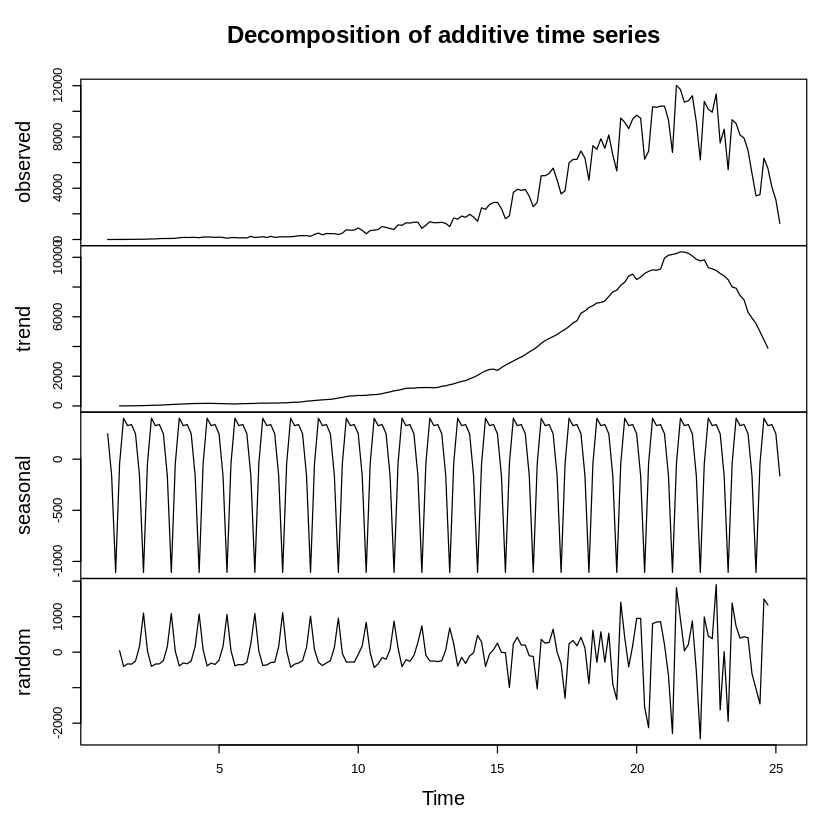

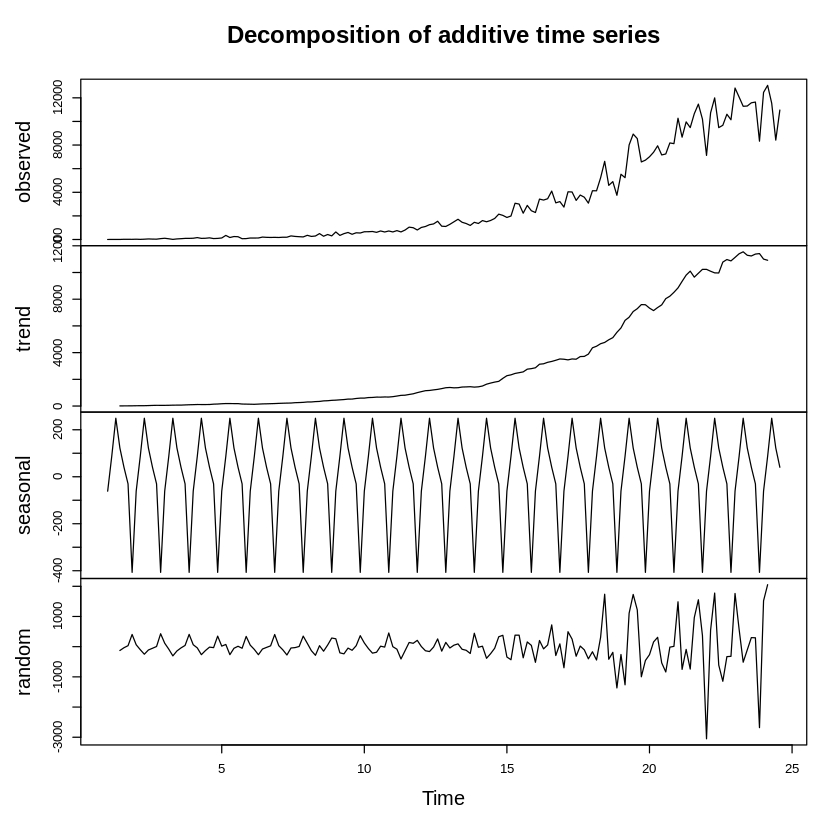

In [182]:
par(mfrow = c(3,2))
plot(decompose(casosFD.ts1))
plot(decompose(casosFN.ts1))
plot(decompose(casosFW.ts1))
par(mfrow = c(1,1))

Luego creamos series de tiempo sin especificar la estacionalidad

In [183]:
casosFD.ts2<-ts(casosFD[-1])
casosFN.ts2<-ts(casosFN[-1])
casosFW.ts2<-ts(casosFW[-1])

Aplicamos diferencia a los datos para conseguir la estacionalidad de las series a las cuales no la especificamos


In [184]:
s.diff.FD.ts2 <- diff(casosFD.ts2)
s.diff.FN.ts2 <- diff(casosFN.ts2)
s.diff.FW.ts2 <- diff(casosFW.ts2)

Ahora se crean las gráficas para observar la función de autocorrelación y la función de autocorrelación parcial

**Función de autocorrelación y función de autocorrelación parcial para la Fecha de diagnostico**

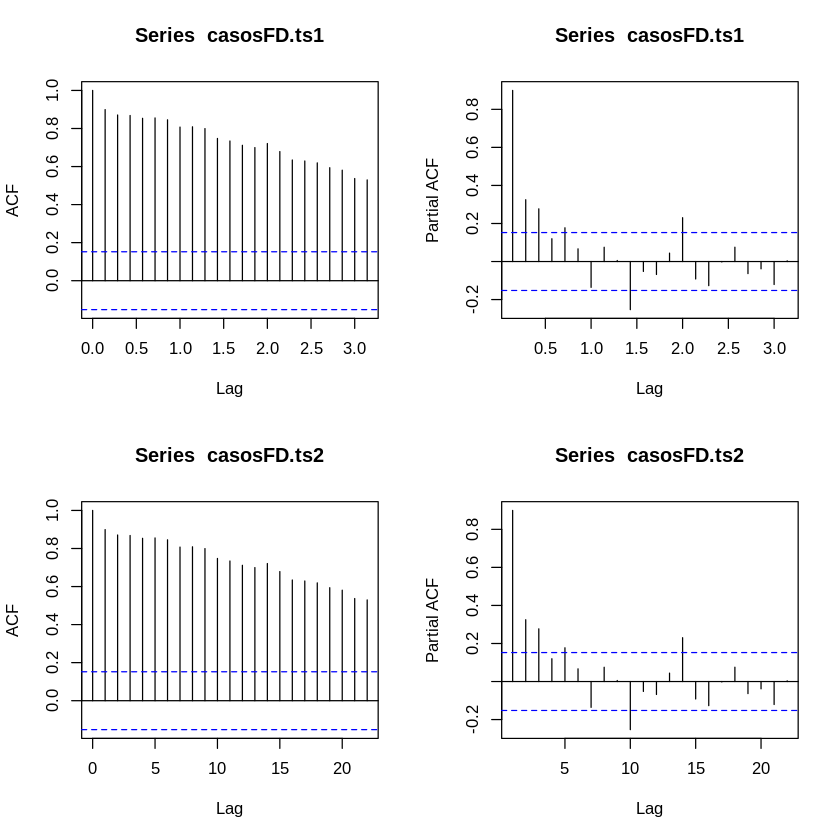

In [185]:
par(mfrow=c(2,2))
acf(casosFD.ts1)
pacf(casosFD.ts1)
acf(casosFD.ts2)
pacf(casosFD.ts2)

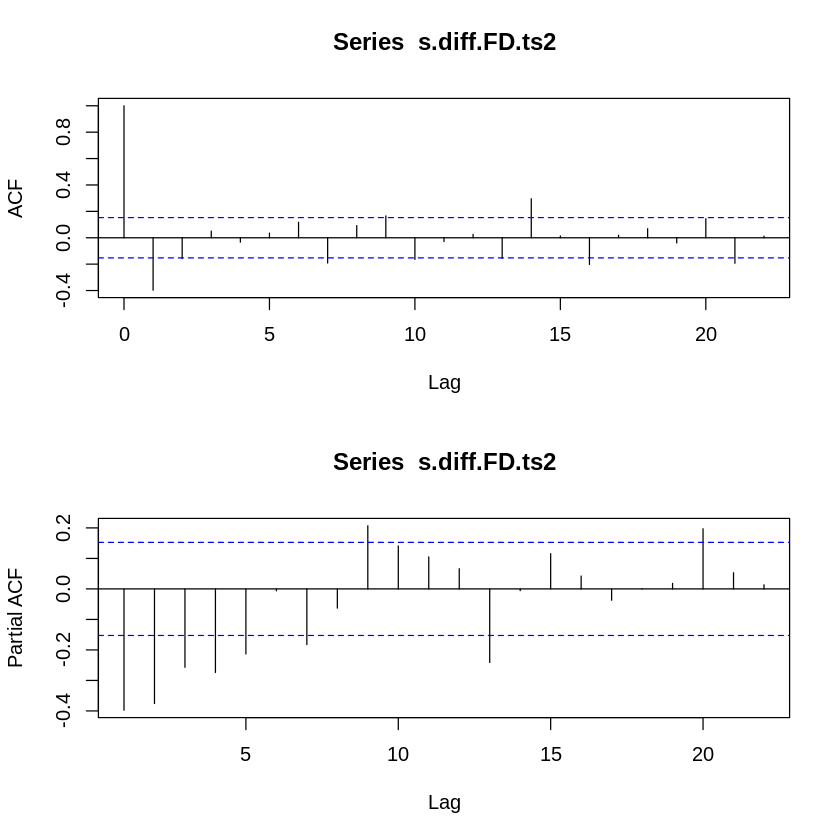

In [186]:
#Gráficas de autocorrelación y función de autocorrelación parcial para la serie a la cual se le aplicó diff
par(mfrow = c(2,1))
acf(s.diff.FD.ts2)
pacf(s.diff.FD.ts2)

**Función de autocorrelación y función de autocorrelación parcial para la Fecha de notificación**

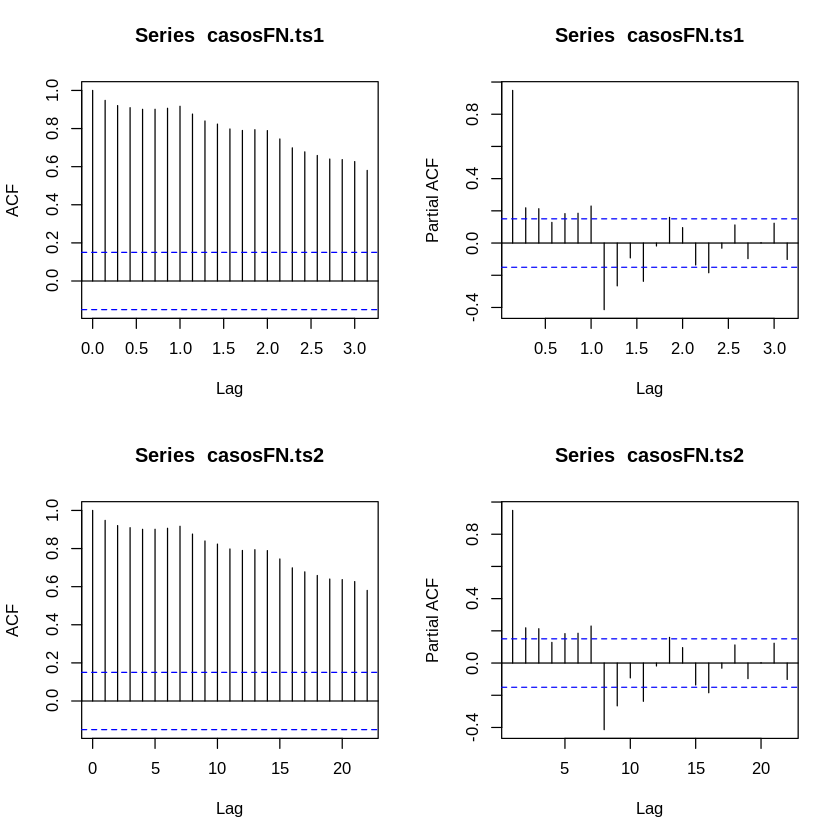

In [187]:
par(mfrow=c(2,2))
acf(casosFN.ts1)
pacf(casosFN.ts1)
acf(casosFN.ts2)
pacf(casosFN.ts2)


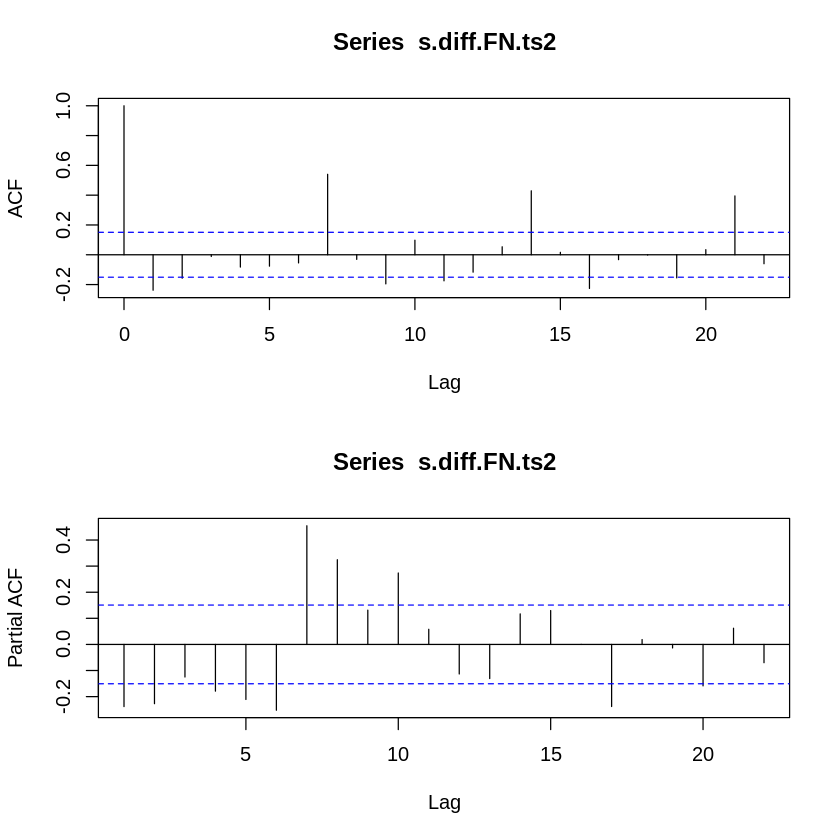

In [188]:
#Gráficas de autocorrelación y función de autocorrelación parcial para la serie a la cual se le aplicó diff
par(mfrow = c(2,1))
acf(s.diff.FN.ts2)
pacf(s.diff.FN.ts2)

**Función de autocorrelación y función de autocorrelación parcial para la Fecha de reporte web**

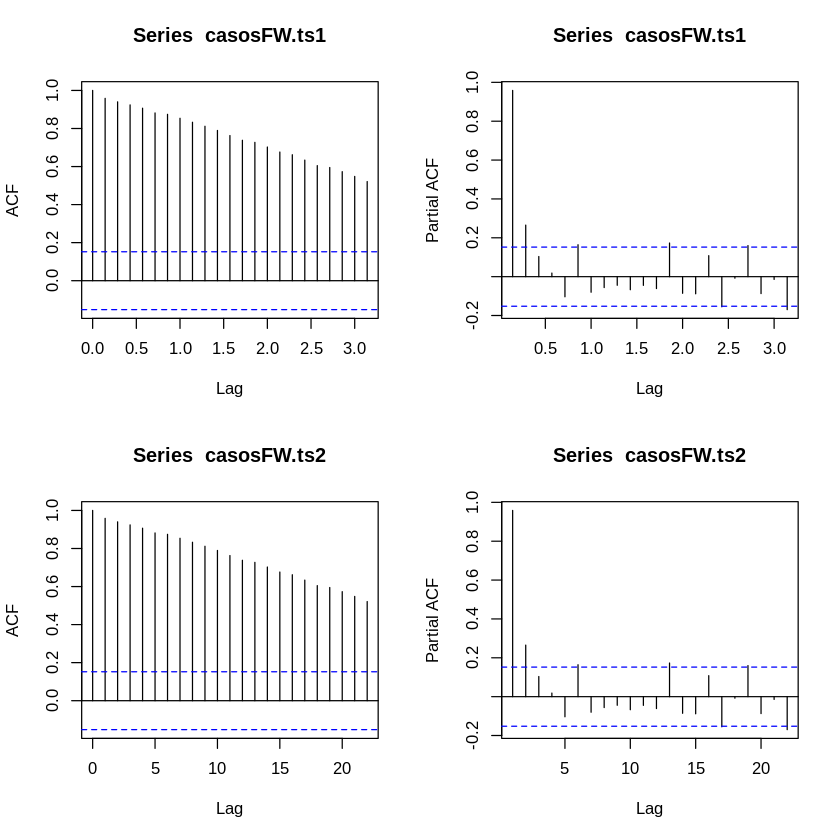

In [189]:
par(mfrow=c(2,2))
acf(casosFW.ts1)
pacf(casosFW.ts1)
acf(casosFW.ts2)
pacf(casosFW.ts2)

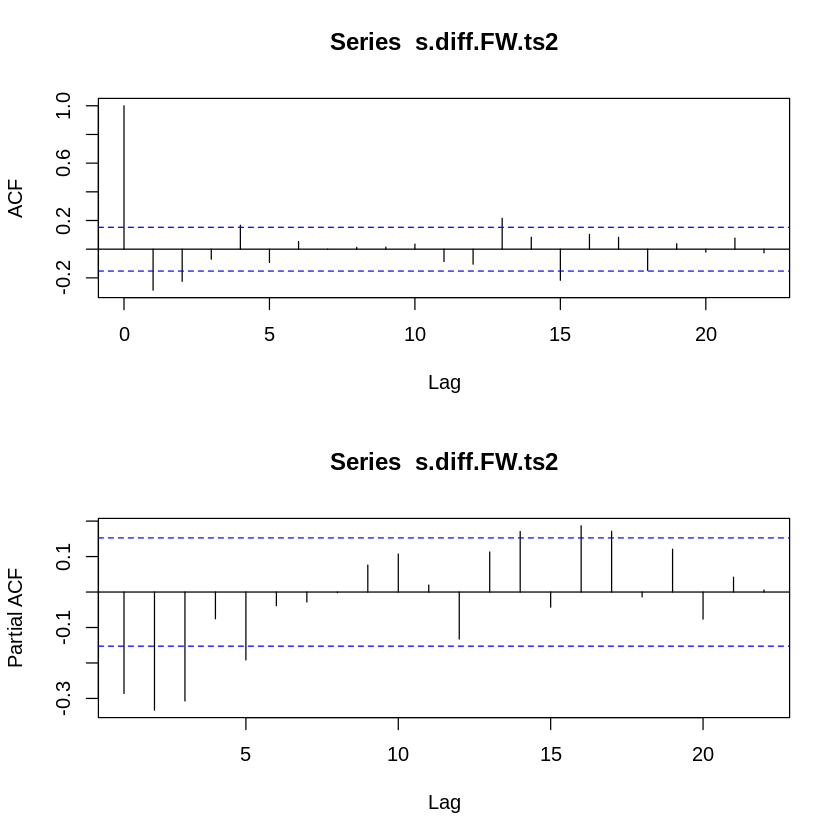

In [190]:
#Gráficas de autocorrelación y función de autocorrelación parcial para la serie a la cual se le aplicó diff
par(mfrow = c(2,1))
acf(s.diff.FW.ts2)
pacf(s.diff.FW.ts2)

Notamos que para nuestros 3 datasets, es decir, Fecha de diagnóstico, Fecha de notificación y fecha de reporte web, la función de autocorrelación sigue un proceso arima ya que decrece lentamente, sin embargo, para la función de autocorrelación parcial no es muy claro cual proceso sigue

Procedemos a identificar el orden de la serie con la función auto.arima para tener una primera aproximación del modelo

###Fecha de Diagnóstico

In [191]:
casosFD_e <- auto.arima(casosFD.ts1)
casosFD_e

Series: casosFD.ts1 
ARIMA(0,1,1)(1,0,2)[7] with drift 

Coefficients:
          ma1     sar1    sma1    sma2    drift
      -0.8195  -0.6863  0.7622  0.5845  62.1007
s.e.   0.0389   0.0989  0.0954  0.0757  22.5718

sigma^2 estimated as 1340552:  log likelihood=-1400.14
AIC=2812.28   AICc=2812.81   BIC=2830.91

Analizando los resultados obtenidos por la función auto.arima, y sabiendo que el orden es 7, podemos decir que los resultados del presente día estan influenciados por lo que se observó hace 7 días.


In [192]:
casosFD_se <- auto.arima(casosFD.ts2)
casosFD_se

Series: casosFD.ts2 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1    drift
      -0.8135  64.2166
s.e.   0.0348  20.1259

sigma^2 estimated as 1835118:  log likelihood=-1423.53
AIC=2853.05   AICc=2853.2   BIC=2862.37

Aplicamos la función auto.arima a los datos a los cuales se les aplicó previamente la diferenciación y a su vez se crean nuevos modelos con el fin de determinar si algunos de estos dan un mejor resultado

In [193]:
ms1_FD <- auto.arima(s.diff.FD.ts2) #(0,0,1)
ms2_FD <- arima(s.diff.FD.ts2, order = c(2,0,1))
ms3_FD <- arima(s.diff.FD.ts2, order = c(2,0,2))
ms4_FD <- arima(s.diff.FD.ts2, order = c(1,0,1))
ms5_FD <- arima(s.diff.FD.ts2, order = c(1,0,2))
ms1_FD

Series: s.diff.FD.ts2 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1     mean
      -0.8135  64.2166
s.e.   0.0348  20.1259

sigma^2 estimated as 1835118:  log likelihood=-1423.53
AIC=2853.05   AICc=2853.2   BIC=2862.37

Procedemos a observar y comparar de una manera más clara los valores de AIC y BIC de los modelos anteriormente creados con el fin de determinar cual de estos es el mejor

In [194]:
AIC(casosFD_e, casosFD_se, ms1_FD,ms2_FD,ms3_FD,ms4_FD,ms5_FD)
BIC(casosFD_e, casosFD_se, ms1_FD,ms2_FD,ms3_FD,ms4_FD,ms5_FD)

,df,AIC
,<dbl>,<dbl>
casosFD_e,6,2812.277
casosFD_se,3,2853.054
ms1_FD,3,2853.054
ms2_FD,5,2849.414
ms3_FD,6,2833.791
ms4_FD,4,2855.053
ms5_FD,5,2856.013


,df,BIC
,<dbl>,<dbl>
casosFD_e,6,2830.913
casosFD_se,3,2862.372
ms1_FD,3,2862.372
ms2_FD,5,2864.943
ms3_FD,6,2852.427
ms4_FD,4,2867.477
ms5_FD,5,2871.543


Analizando los resultados obtenidos para el AIC y BIC, se escoge los valores para modelo arima dados por: casosFD_e, que significa la serie de tiempo a la cual se le aplicó la estacionariedad.

In [195]:
auto.arima(casosFD.ts1, trace=TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,0,1)[7] with drift         : 2828.468
 ARIMA(0,1,0)           with drift         : 2918.033
 ARIMA(1,1,0)(1,0,0)[7] with drift         : 2896.637
 ARIMA(0,1,1)(0,0,1)[7] with drift         : 2839.33
 ARIMA(0,1,0)                              : 2916.11
 ARIMA(2,1,2)(0,0,1)[7] with drift         : 2830.945
 ARIMA(2,1,2)(1,0,0)[7] with drift         : 2836.747
 ARIMA(2,1,2)(2,0,1)[7] with drift         : Inf
 ARIMA(2,1,2)(1,0,2)[7] with drift         : 2801.014
 ARIMA(2,1,2)(0,0,2)[7] with drift         : 2803.928
 ARIMA(2,1,2)(2,0,2)[7] with drift         : 2810.214
 ARIMA(1,1,2)(1,0,2)[7] with drift         : 2798.633
 ARIMA(1,1,2)(0,0,2)[7] with drift         : Inf
 ARIMA(1,1,2)(1,0,1)[7] with drift         : Inf
 ARIMA(1,1,2)(2,0,2)[7] with drift         : 2807.879
 ARIMA(1,1,2)(0,0,1)[7] with drift         : 2843.502
 ARIMA(1,1,2)(2,0,1)[7] with drift         : Inf
 ARIMA(0,1,2)(1,0,2)[7] with drift         

Series: casosFD.ts1 
ARIMA(0,1,1)(1,0,2)[7] with drift 

Coefficients:
          ma1     sar1    sma1    sma2    drift
      -0.8195  -0.6863  0.7622  0.5845  62.1007
s.e.   0.0389   0.0989  0.0954  0.0757  22.5718

sigma^2 estimated as 1340552:  log likelihood=-1400.14
AIC=2812.28   AICc=2812.81   BIC=2830.91

De igual forma aplicando la funcion auto.arima() con trace=TRUE verificamos que el mejor modelo, es decir el que tiene menor AIC y BIC es el modelo ARIMA(0,1,1)(1,0,2)[7] with drift 

###Fecha de notificación

In [196]:
casosFN_e <- auto.arima(casosFN.ts1)
casosFN_e

Series: casosFN.ts1 
ARIMA(0,1,3)(0,1,2)[7] 

Coefficients:
          ma1     ma2     ma3     sma1    sma2
      -0.7353  0.0545  0.1565  -0.5651  0.1411
s.e.   0.0835  0.1015  0.0779   0.0973  0.1006

sigma^2 estimated as 560678:  log likelihood=-1300.96
AIC=2613.91   AICc=2614.46   BIC=2632.44

Analizando los resultados obtenidos por la función auto.arima, y sabiendo que el orden es 7, podemos decir que los resultados del presente día estan influenciados por lo que se observó hace 7 días.

In [197]:
casosFN_se <- auto.arima(casosFN.ts2)
casosFN_se

Series: casosFN.ts2 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      1.0681  -0.6893  -1.5236  0.8533
s.e.  0.0689   0.0800   0.0482  0.0467

sigma^2 estimated as 904547:  log likelihood=-1397.63
AIC=2805.27   AICc=2805.64   BIC=2820.92

Aplicamos la función auto.arima a los datos a los cuales se les aplicó previamente la diferenciación y a su vez se crean nuevos modelos con el fin de determinar si algunos de estos dan un mejor resultado.

In [198]:
ms1_FN <- auto.arima(s.diff.FN.ts2) #(2,0,2)
ms2_FN <- arima(s.diff.FN.ts2, order = c(2,0,1))
ms3_FN <- arima(s.diff.FN.ts2, order = c(2,0,2))
ms4_FN <- arima(s.diff.FN.ts2, order = c(1,0,1))
ms5_FN <- arima(s.diff.FN.ts2, order = c(1,0,2))
ms1_FN

Series: s.diff.FN.ts2 
ARIMA(2,0,2) with zero mean 

Coefficients:
         ar1      ar2      ma1     ma2
      1.0681  -0.6893  -1.5236  0.8533
s.e.  0.0689   0.0800   0.0482  0.0467

sigma^2 estimated as 904547:  log likelihood=-1397.63
AIC=2805.27   AICc=2805.64   BIC=2820.92

Procedemos a observar y comparar de una manera más clara los valores de AIC y BIC de los modelos anteriormente creados con el fin de determinar cual de estos es el mejor.

In [199]:
AIC(casosFN_e, casosFN_se,ms1_FN,ms2_FN,ms3_FN,ms4_FN,ms5_FN)
BIC(casosFN_e, casosFN_se,ms1_FN,ms2_FN,ms3_FN,ms4_FN,ms5_FN)

Warning message in AIC.default(casosFN_e, casosFN_se, ms1_FN, ms2_FN, ms3_FN, ms4_FN, :
“models are not all fitted to the same number of observations”


,df,AIC
,<dbl>,<dbl>
casosFN_e,6,2613.913
casosFN_se,5,2805.269
ms1_FN,5,2805.269
ms2_FN,5,2835.307
ms3_FN,6,2807.098
ms4_FN,4,2836.075
ms5_FN,5,2836.009


Warning message in BIC.default(casosFN_e, casosFN_se, ms1_FN, ms2_FN, ms3_FN, ms4_FN, :
“models are not all fitted to the same number of observations”


,df,BIC
,<dbl>,<dbl>
casosFN_e,6,2632.439
casosFN_se,5,2820.918
ms1_FN,5,2820.918
ms2_FN,5,2850.957
ms3_FN,6,2825.878
ms4_FN,4,2848.595
ms5_FN,5,2851.658


In [200]:
auto.arima(casosFN.ts1, trace=TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,1,1)[7]                    : Inf
 ARIMA(0,1,0)(0,1,0)[7]                    : 2605.004
 ARIMA(1,1,0)(1,1,0)[7]                    : 2536.497
 ARIMA(0,1,1)(0,1,1)[7]                    : 2504.171
 ARIMA(0,1,1)(0,1,0)[7]                    : 2532.263
 ARIMA(0,1,1)(1,1,1)[7]                    : 2512.748
 ARIMA(0,1,1)(0,1,2)[7]                    : 2505.292
 ARIMA(0,1,1)(1,1,0)[7]                    : 2515.359
 ARIMA(0,1,1)(1,1,2)[7]                    : 2513.203
 ARIMA(0,1,0)(0,1,1)[7]                    : 2553.607
 ARIMA(1,1,1)(0,1,1)[7]                    : 2505.055
 ARIMA(0,1,2)(0,1,1)[7]                    : 2502.844
 ARIMA(0,1,2)(0,1,0)[7]                    : 2533.32
 ARIMA(0,1,2)(1,1,1)[7]                    : 2509.883
 ARIMA(0,1,2)(0,1,2)[7]                    : 2501.763
 ARIMA(0,1,2)(1,1,2)[7]                    : 2508.358
 ARIMA(1,1,2)(0,1,2)[7]                    : Inf
 ARIMA(0,1,3)(0,1,2)[7]         

Series: casosFN.ts1 
ARIMA(0,1,3)(0,1,2)[7] 

Coefficients:
          ma1     ma2     ma3     sma1    sma2
      -0.7353  0.0545  0.1565  -0.5651  0.1411
s.e.   0.0835  0.1015  0.0779   0.0973  0.1006

sigma^2 estimated as 560678:  log likelihood=-1300.96
AIC=2613.91   AICc=2614.46   BIC=2632.44

Teniendo la información anterior, podemos decir que el menor modelo es el ARIMA(0,1,3)(0,1,2)[7]   

____________________________________________________________________________

###Fecha de reporte web

In [201]:
casosFW_e <- auto.arima(casosFW.ts1)
casosFW_e

Series: casosFW.ts1 
ARIMA(2,1,1) with drift 

Coefficients:
         ar1      ar2      ma1   drift
      0.1178  -0.2502  -0.6358  67.919
s.e.  0.1041   0.0904   0.0827  19.661

sigma^2 estimated as 614713:  log likelihood=-1332.09
AIC=2674.18   AICc=2674.56   BIC=2689.71

In [202]:
casosFW_se <- auto.arima(casosFW.ts2)
casosFW_se

Series: casosFW.ts2 
ARIMA(2,1,1) with drift 

Coefficients:
         ar1      ar2      ma1   drift
      0.1178  -0.2502  -0.6358  67.919
s.e.  0.1041   0.0904   0.0827  19.661

sigma^2 estimated as 614713:  log likelihood=-1332.09
AIC=2674.18   AICc=2674.56   BIC=2689.71

Aplicamos la función auto.arima a los datos a los cuales se les aplicó previamente la diferenciación y a su vez se crean nuevos modelos con el fin de determinar si algunos de estos dan un mejor resultado.

In [203]:
ms1_FW <-auto.arima(s.diff.FW.ts2) #(2,0,1)
ms2_FW <- arima(s.diff.FW.ts2, order = c(2,0,2))
ms3_FW <- arima(s.diff.FW.ts2, order = c(1,0,1))
ms4_FW <- arima(s.diff.FW.ts2, order = c(1,0,2))
ms1_FW

Series: s.diff.FW.ts2 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
         ar1      ar2      ma1    mean
      0.1178  -0.2502  -0.6358  67.919
s.e.  0.1041   0.0904   0.0827  19.661

sigma^2 estimated as 614713:  log likelihood=-1332.09
AIC=2674.18   AICc=2674.56   BIC=2689.71

Procedemos a observar y comparar de una manera más clara los valores de AIC y BIC de los modelos anteriormente creados con el fin de determinar cual de estos es el mejor.

In [204]:
AIC(casosFW_e, casosFW_se,ms1_FW,ms2_FW,ms3_FW,ms4_FW)
BIC(casosFW_e, casosFW_se,ms1_FW,ms2_FW,ms3_FW,ms4_FW)

,df,AIC
,<dbl>,<dbl>
casosFW_e,5,2674.178
casosFW_se,5,2674.178
ms1_FW,5,2674.178
ms2_FW,6,2674.172
ms3_FW,4,2679.173
ms4_FW,5,2678.659


,df,BIC
,<dbl>,<dbl>
casosFW_e,5,2689.708
casosFW_se,5,2689.708
ms1_FW,5,2689.708
ms2_FW,6,2692.808
ms3_FW,4,2691.597
ms4_FW,5,2694.189


In [205]:
auto.arima(casosFW.ts1, trace=TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,0,1)[7] with drift         : Inf
 ARIMA(0,1,0)           with drift         : 2706.976
 ARIMA(1,1,0)(1,0,0)[7] with drift         : 2704.378
 ARIMA(0,1,1)(0,0,1)[7] with drift         : 2668.062
 ARIMA(0,1,0)                              : 2705.805
 ARIMA(0,1,1)           with drift         : 2666.831
 ARIMA(0,1,1)(1,0,0)[7] with drift         : 2674.345
 ARIMA(0,1,1)(1,0,1)[7] with drift         : Inf
 ARIMA(1,1,1)           with drift         : 2666.245
 ARIMA(1,1,1)(1,0,0)[7] with drift         : 2673.771
 ARIMA(1,1,1)(0,0,1)[7] with drift         : 2667.536
 ARIMA(1,1,1)(1,0,1)[7] with drift         : Inf
 ARIMA(1,1,0)           with drift         : 2695.257
 ARIMA(2,1,1)           with drift         : 2662.175
 ARIMA(2,1,1)(1,0,0)[7] with drift         : 2670.069
 ARIMA(2,1,1)(0,0,1)[7] with drift         : 2663.677
 ARIMA(2,1,1)(1,0,1)[7] with drift         : Inf
 ARIMA(2,1,0)           with drift       

Series: casosFW.ts1 
ARIMA(2,1,1) with drift 

Coefficients:
         ar1      ar2      ma1   drift
      0.1178  -0.2502  -0.6358  67.919
s.e.  0.1041   0.0904   0.0827  19.661

sigma^2 estimated as 614713:  log likelihood=-1332.09
AIC=2674.18   AICc=2674.56   BIC=2689.71

Teniendo la información anterior, podemos decir que el menor modelo es el ARIMA(2,1,1) en comparación con todos los demás

###Conclusiones

Para finalizar, haremos un pronóstico con la serie a la cual le aplicamos la estacionalidad ya que fue la que nos representó un mejor modelo

Para Fecha de diagnóstico

In [206]:
forecast(casosFD,6)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
168       10283.70 5935.912 14631.49 3634.332 16933.07
169       10238.45 5805.616 14671.29 3459.012 17017.90
170       10193.21 5655.444 14730.98 3253.296 17133.12
171       10147.97 5484.651 14811.28 3016.042 17279.89
172       10102.72 5292.806 14912.64 2746.591 17458.85
173       10057.48 5079.763 15035.19 2444.721 17670.23

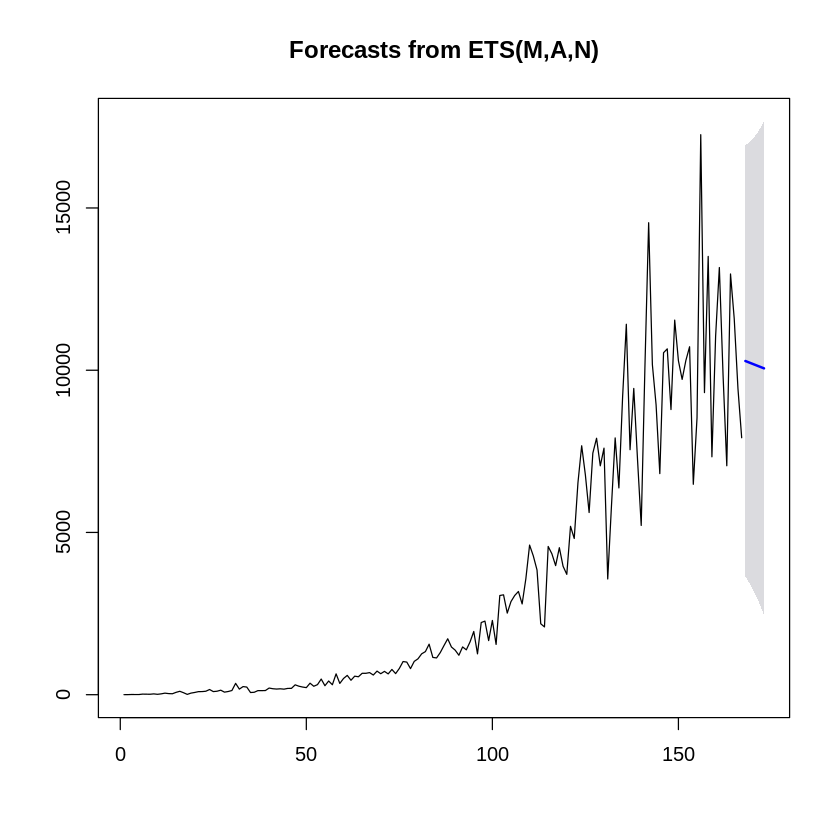

In [207]:
futurDiag <- forecast(casosFD,h=6, level=c(95))
plot(futurDiag)

Observando las predicciones y la gráfica de predicciones podemos decir que va a ir disminuyendo poco a poco la frecuencia de los casos diagnosticados con covid-19

Para Fecha de notificación

In [208]:
forecast(casosFN,6)

    Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
172      2252.0516 1446.37708 3057.726 1019.8788 3484.224
173      1994.0357 1169.27634 2818.795  732.6751 3255.396
174      1736.0199  891.85751 2580.182  444.9850 3027.055
175      1478.0040  613.24282 2342.765  155.4659 2800.542
176      1219.9881  332.47398 2107.502 -137.3476 2577.324
177       961.9723   48.52261 1875.422 -435.0284 2358.973

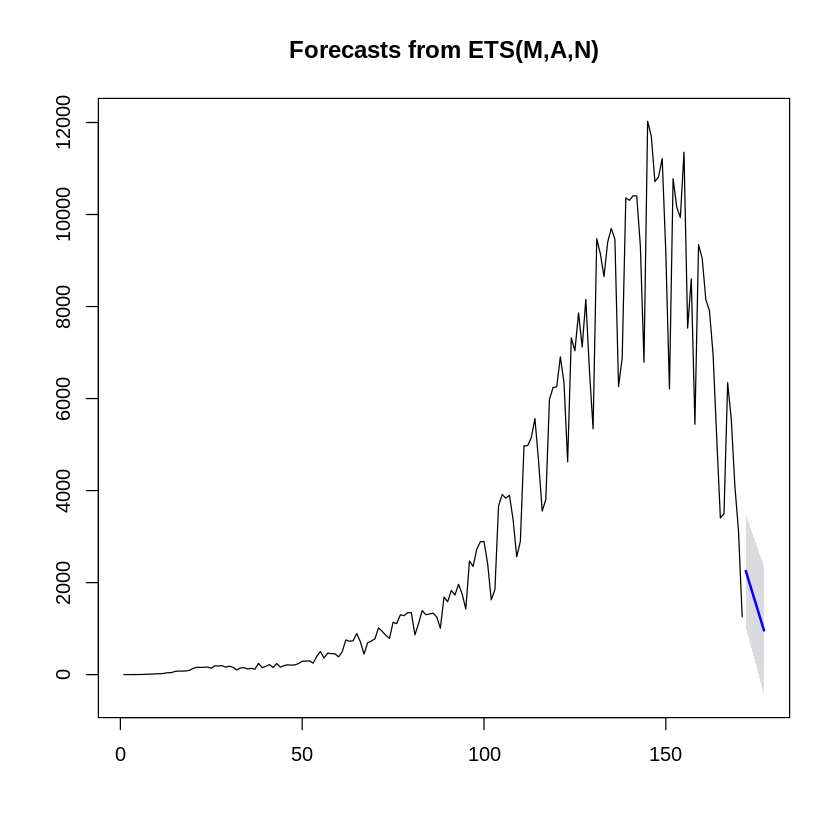

In [209]:
futurNot <- forecast(casosFN,h=6, level=c(95))
plot(futurNot)

Observando las predicciones y la gráfica de predicciones podemos decir que va a disminuir notoriamente la frecuencia de los casos notificados con covid-19

Para fecha de reporte web

In [210]:
forecast(casosFW,6)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
168       11238.57 6811.928 15665.21 4468.606 18008.53
169       11340.16 6680.560 15999.76 4213.916 18466.41
170       11441.76 6542.895 16340.62 3949.593 18933.92
171       11543.35 6398.957 16687.75 3675.678 19411.03
172       11644.95 6248.765 17041.13 3392.198 19897.70
173       11746.54 6092.326 17400.76 3099.164 20393.92

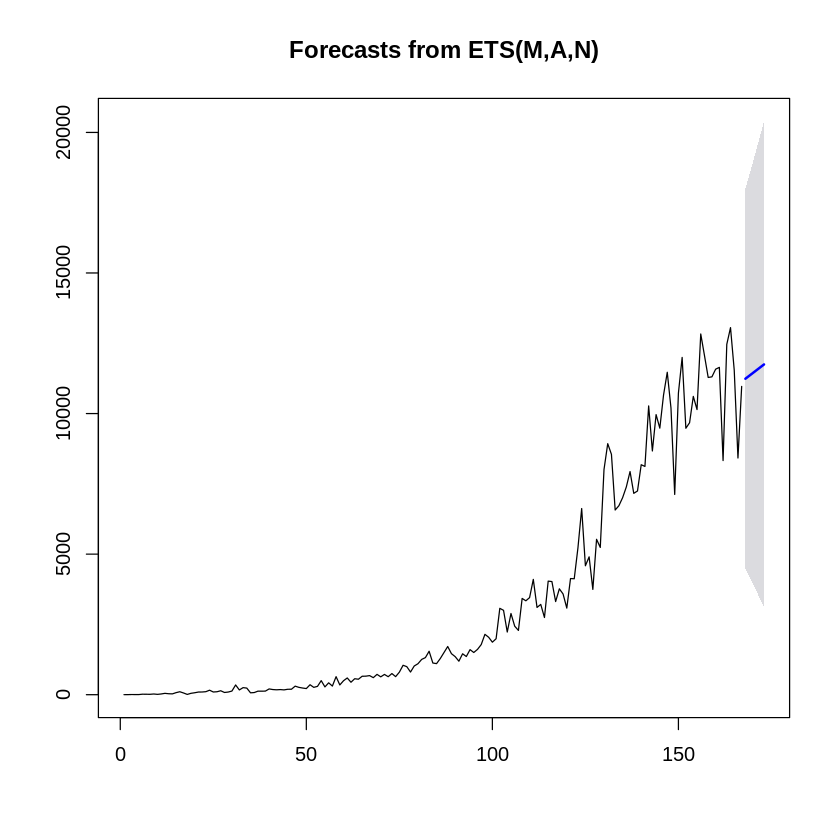

In [211]:
futurRep <- forecast(casosFW,h=6, level=c(95))
plot(futurRep)

Observando las predicciones y la gráfica de predicciones podemos decir que van a incrementar los casos de reporte en la web a medida que pase el tiempo
<hr>

Para concluir podemos ver que existe cierta contradicción a la hora de predecir los valores para las distintas fechas ya que, para los diagnósticos y notificaciones de infectados se dice que va a disminuir la frecuencia en los siguientes seis días, mientras que para los reportes en la web se va a aumentar esta frecuencia, esto se puede deber a que no se estan diagnosticando y notificando a pacientes de la forma más optima posible.

## **Estadística no paramétrica**

<p align="justify">Con base en los datos trabajados en el módulo de muestreo (archivo adjunto en el enlace) extraiga una muestra representativa (calcule el tamaño para un nivel de confianza de 89% y un error de 3% y use ese tamaño específico) y determine si la clasificación en niveles de desempeño en dos de las cinco competencias genéricas son producto del azar o no.

Determine si esos resultados son independientes o dependientes entre sí.
</p>
<p align="justify">
Con la muestra, calcule un promedio general por estudiante para las cinco competencia y realice un ranking inicial y un ranking final por departamento; determine si hubo cambios significativos en esa clasificación</p>

[Descargue el archivo aquí](https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1)


### Tratamiento de datos

Importamos el dataFrame

In [212]:
load(url('https://www.dropbox.com/s/mp094kybobr2ubs/saberpro.RData?dl=1'))
ls()

Warning message in load(url("https://www.dropbox.com/s/mp094kybobr2ubs/saberpro.RData?dl=1")):
“input string 'COLEGIO DE ESTUDIOS SUPERIORES DE ADMINISTRACION-CESA-BOGOTÁ D.C.' cannot be translated to UTF-8, is it valid in 'CP1252'?”
Warning message in load(url("https://www.dropbox.com/s/mp094kybobr2ubs/saberpro.RData?dl=1")):
“input string 'COLEGIO MAYOR DE NUESTRA SEÑORA DEL ROSARIO-BOGOTÁ D.C.' cannot be translated to UTF-8, is it valid in 'CP1252'?”
Warning message in load(url("https://www.dropbox.com/s/mp094kybobr2ubs/saberpro.RData?dl=1")):
“input string 'CORPORACION ESCUELA DE ARTES Y LETRAS-BOGOTÁ D.C.' cannot be translated to UTF-8, is it valid in 'CP1252'?”
Warning message in load(url("https://www.dropbox.com/s/mp094kybobr2ubs/saberpro.RData?dl=1")):
“input string 'CORPORACION INTERNACIONAL PARA EL DESARROLLO EDUCATIVO -CIDE-BOGOTÁ D.C.' cannot be translated to UTF-8, is it valid in 'CP1252'?”
Warning message in load(url("https://www.dropbox.com/s/mp094kybobr2ubs/saberpro.RDa

[1] "a"             "casos_FD"      "casos_FN"      "casos_FW"     
 [5] "casosFD"       "casosFD_e"     "casosFD_se"    "casosFD.ts1"  
 [9] "casosFD.ts2"   "casosFN"       "casosFN_e"     "casosFN_se"   
[13] "casosFN.ts1"   "casosFN.ts2"   "casosFW"       "casosFW_e"    
[17] "casosFW_se"    "casosFW.ts1"   "casosFW.ts2"   "covid_19"     
[21] "E"             "Estra"         "Estratos"      "futurDiag"    
[25] "futurNot"      "futurRep"      "i"             "ms1_FD"       
[29] "ms1_FN"        "ms1_FW"        "ms2_FD"        "ms2_FN"       
[33] "ms2_FW"        "ms3_FD"        "ms3_FN"        "ms3_FW"       
[37] "ms4_FD"        "ms4_FN"        "ms4_FW"        "ms5_FD"       
[41] "ms5_FN"        "muestra"       "O2016"         "O2017"        
[45] "O2018"         "P1"            "P2"            "p2016"        
[49] "p2017"         "p2018"         "P3"            "primer"       
[53] "Puntaje"       "s.diff.FD.ts2" "s.diff.FN.ts2" "s.diff.FW.ts2"
[57] "saberPro"      "sampl"         "sp161718"      "total"        
[61] "totalPuesto"   "vec"

Se eliminan las filas dondé hay datos perdidos

In [213]:
sp161718 <- sp161718[is.na(sp161718$raz_cuant_punt) == FALSE & is.na(sp161718$lect_crit_punt) == FALSE & is.na(sp161718$comp_ciud_punt) == FALSE & is.na(sp161718$ingles_punt) == FALSE & is.na(sp161718$comu_escr_punt) == FALSE,]

In [214]:
saberPro <- data.frame(
  index = 1:nrow(sp161718),
  periodo = sp161718$periodo,
  departamento = sp161718$estu_depto_reside,
  RC = sp161718$raz_cuant_punt,
  PRC = sp161718$raz_cuant_des,
  LC = sp161718$lect_crit_punt,
  PLC = sp161718$lect_crit_des,
  CC = sp161718$comp_ciud_punt,
  PCC = sp161718$comp_ciud_des,
  IN = sp161718$ingles_punt,
  PIN = sp161718$ingles_desem,
  CE = sp161718$comu_escr_punt,
  PCE = sp161718$comu_escr_des
)

Se colocan como factor ciertas variables categóticas y se arreglan algunos nombres de los departamentos

In [215]:
primer <- substring(saberPro$periodo, 1,4) #A la serie periodo de dejamos sólo el año
saberPro$periodo <- as.character(saberPro$periodo)  #convertimos la serie periodo a caracteres
saberPro$periodo <- primer
saberPro[,3]<-revalue(saberPro[,'departamento'],c('NARIÃƒâ€˜O'="NARIÑO",'NARIÃ‘O'="NARIÑO"))
saberPro$periodo <- as.factor(saberPro$periodo)
saberPro$PRC = as.factor(saberPro$PRC) 
saberPro$PLC = as.factor(saberPro$PLC) 
saberPro$PCC = as.factor(saberPro$PCC) 
saberPro$PIN = as.factor(saberPro$PIN) 
saberPro$PCE = as.factor(saberPro$PCE) 

In [216]:
head(saberPro)

,index,periodo,departamento,RC,PRC,LC,PLC,CC,PCC,IN,PIN,CE,PCE
,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>
1,1,2016,ATLANTICO,160,3,130,2,167,3,160,A2,155,3
2,2,2016,CUNDINAMARCA,138,2,132,2,77,1,125,A1,164,3
3,3,2016,CALDAS,146,2,157,2,150,2,104,A1-,122,2
4,4,2016,MAGDALENA,160,3,172,3,151,2,160,A2,192,4
5,5,2016,CORDOBA,130,2,122,1,144,2,192,B1,131,2
6,6,2016,CAUCA,159,3,129,2,147,2,108,A1-,154,3


Realizamos un muestro con un nivel de confianza del 95% y un error del 3%, pues con un nivel de confanza del 89% nos dimos cuenta que no era tan representativa

In [217]:
#error del 3%, probabilidad de seleccionar los datos del 50%, nivel de confianza del 95%
muestra <- sample.size.prop(e=0.03, P = 0.5, N = length(saberPro$RC), level = 0.95)$n
P1<- sample(1:nrow(saberPro),size=muestra,replace=FALSE)

Realizamos los estratos por departamento, pero también teniendo en cuenta el periodo

In [218]:
Estratos<- saberPro %>%
  select(departamento,periodo) %>%
  group_by(departamento,periodo) %>%
  summarise(n=n()) %>%
  mutate(p=(n/725295))
#Hallamos el tamaño de la muestra para cada estrato dependiendo de la muestra total
P2<-nstrata(n=muestra,wh=Estratos[,4],method="proportional")
Estra<-data.frame(fac1=Estratos$departamento,fac2=Estratos$periodo,n=Estratos$n,P2)

`summarise()` regrouping output by 'departamento' (override with `.groups` argument)



P3 es nuestra muestra por deartamentos y por periodos de tiempo

In [219]:
P3 <- c()
a = c(4:nrow(Estra))
for (i in a){
  #construimos un vector con los índices que pertenecen a un departamento en específico y a un periodo en específico
  vec <- saberPro[saberPro$periodo==Estra[i,2] & saberPro$departamento==Estra[i,1],'index']
  sampl <- sample(vec,size=Estra[i,4],replace=FALSE)
  #Construimos un vector que nos permita seleccionar la muestra:
  P3<-append(P3,sampl)
}

### Prueba de Bondad de Ajuste

determine si la clasificación en niveles de desempeño en dos de las cinco competencias genéricas son producto del azar o no.

Las hipótesis

* $H_{0}:$ No hay diferencia entre las proporciones de las categorías.
* $H_{1}:$ Existe diferencia entre las proporciones de las categorías.

#####Observemos si los datos del Nivel de Desempeño Razonamiento Cuantitativo (PRC) son producto del azar.

In [220]:
table(saberPro[P3,c('PRC')])


  1   2   3   4 
275 354 426  38 

In [221]:
chisq.test(table(saberPro[P3,c('PRC')]))


	Chi-squared test for given probabilities

data:  table(saberPro[P3, c("PRC")])
X-squared = 311.8, df = 3, p-value < 2.2e-16


In [222]:
with(chisq.test(table(saberPro[P3,c('PRC')])), data.frame(observed,expected))

,Var1,Freq,expected
,<fct>,<int>,<dbl>
1,1,275,273.25
2,2,354,273.25
3,3,426,273.25
4,4,38,273.25


<p align="justify">Según la prueba X-squared, podemos observar que tenemos 3 grados de libertad y por el valor del P_Value rechazamos la hipótesis nula, por lo tanto concluimos que existe diferencia entre las proporciones de las categorías del nivel de desempeño de Razonamiento cuantitativo, además, debido a esto, es válido confirmar que <strong>los datos no son productos del Azar</strong>, por otro lado, vemos que el nivel de desempeño que más frecuencia posee, es el nivel 3 y que el nivel mas alto (4) es el que menor frecuencia presenta de todos los niveles</p>

#####Observemos si los datos del Nivel de Desempeño Lectura Crítica (PLC) son producto del azar.

In [223]:
chisq.test(table(saberPro[P3,c('PLC')]))


	Chi-squared test for given probabilities

data:  table(saberPro[P3, c("PLC")])
X-squared = 277.71, df = 3, p-value < 2.2e-16


In [224]:
with(chisq.test(table(saberPro[P3,c('PLC')])), data.frame(observed,expected))

,Var1,Freq,expected
,<fct>,<int>,<dbl>
1,1,235,273.25
2,2,399,273.25
3,3,395,273.25
4,4,64,273.25


<p align="justify">Según la prueba X-squared, podemos observar que tenemos 3 grados de libertad y por el valor del P_Value rechazamos la hipótesis nula, por lo tanto concluimos que existe diferencia entre las proporciones de las categorías del nivel de desempeño de Lectura Crítica, además, debido a esto, es válido confirmar que <strong>los datos no son productos del Azar</strong>, por otro lado, vemos que el nivel de desempeño que más frecuencia posee, es el nivel 2 y que el nivel mas alto (4) es el que menor frecuencia presenta de todos los niveles</p>

### Prueba de Independencia (Tablas de Contingencia)

Determine si esos resultados son independientes o dependientes entre sí.

Las hipótesis

* $H_{0}:$ PRC y PLC Son Independientes
* $H_{1}:$ PRC y PLC Son Dependientes

In [225]:
with(saberPro[P3,], table(PRC,PLC))

   PLC
PRC   1   2   3   4
  1 131 115  28   1
  2  81 164 106   3
  3  23 116 240  47
  4   0   4  21  13

In [226]:
with(saberPro[P3,], chisq.test(table(PLC,PRC)))

Warning message in chisq.test(table(PLC, PRC)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(PLC, PRC)
X-squared = 383.75, df = 9, p-value < 2.2e-16


<p align="justify">Según el P_value del Pearson's Chi-squared test rechazamos la hipótesis nula y concluimos que el Nivel de Desempeño Lectura Crítica (PLC) y el Nivel de Desempeño Razonamiento Cuantitativo (PRC) son dependientes entre sí</p>

### Prueba de Signos (Datos Ordenados)

<p align="justify">Con la muestra, calcule un promedio general por estudiante para las cinco competencias y realice un ranking inicial y un ranking final por departamento; determine si hubo cambios significativos en esa clasificación</p>

Creamos un el dataset Puntaje con el periodo de la prueba, el departamento y el puntaje total obtenido por el departamento para las 5 pruebas en cada periodo

In [227]:
Puntaje <- data.frame(
  periodo = saberPro[P3,'periodo'],
  departamento = saberPro[P3,'departamento'],
  puntajeTotal = ((saberPro[P3,'RC']+saberPro[P3,'LC']+saberPro[P3,'CC']+saberPro[P3,'IN']+saberPro[P3,'CE'])/5)
)

Agrupamos los datos por departamento y periodo de tal modo que sólo tengamos un dato puntaje para un departamento en un periodo determinado

In [228]:
E<- Puntaje %>%
  select(departamento,periodo,puntajeTotal) %>%
  group_by(departamento,periodo) %>%
  summarise(puntajeGlobal=mean(puntajeTotal))

`summarise()` regrouping output by 'departamento' (override with `.groups` argument)



Construimos el dataset del puntaje obtenido en un periodo  con respecto al departamento

In [229]:
p2017<-E[E$periodo=='2017',c('puntajeGlobal')]
p2018<-E[E$periodo=='2018',c('puntajeGlobal')]
p2016<-E[E$periodo=='2016',c('puntajeGlobal')]
total <- data.frame(departamento=unique(E$departamento),P2016 = p2016,P2017 = p2017,P2018=p2018)
names(total)<-c('departamento','P2016','P2017','P2018')

In [230]:
O2016<-total[,c(1,2)] %>% arrange(desc(P2016)) %>% mutate(puesto2016 = row_number())
O2017<-total[,c(1,3)] %>% arrange(desc(P2017))  %>% mutate(puesto2017 = row_number())
O2018<-total[,c(1,4)] %>% arrange(desc(P2018))  %>% mutate(puesto2018 = row_number())
totalPuesto<- merge (O2016, O2017, by.x = "departamento",by.y = "departamento")
totalPuesto<- merge (totalPuesto, O2018, by.x = "departamento",by.y = "departamento")
totalPuesto <- totalPuesto %>% arrange(desc(P2016))
head(totalPuesto)

,departamento,P2016,puesto2016,P2017,puesto2017,P2018,puesto2018
,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
1,MAGDALENA,163.0800,1,152.7667,3,137.0667,21
2,SANTANDER,157.9444,2,151.0556,5,140.2118,18
3,CUNDINAMARCA,156.4842,3,145.0105,10,150.1900,7
4,CALDAS,156.3500,4,155.7429,2,147.2571,10
5,BOGOTA,153.7096,5,158.2922,1,156.2592,2
6,ANTIOQUIA,152.3952,6,152.1381,4,147.7571,8


hipótesis:

* $H_{0}: mediana = 0$
* $H_{1}: mediana \neq 0$

Para los periodos 2016 y 2017

In [231]:
wilcoxsign_test(puesto2016 ~ puesto2017, data = totalPuesto, distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -0.56515, p-value = 0.5794
alternative hypothesis: true mu is not equal to 0


Para los periodos 2016 y 2018

In [232]:
wilcoxsign_test(puesto2016 ~ puesto2018, data = totalPuesto, distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -0.32512, p-value = 0.7514
alternative hypothesis: true mu is not equal to 0


Para los periodos 2017 y 2018

In [233]:
wilcoxsign_test(puesto2017 ~ puesto2018, data = totalPuesto, distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -0.11127, p-value = 0.9159
alternative hypothesis: true mu is not equal to 0


<p align="justify">Según el P_value de nuestos test exactos de Wilcoxon-Pratt no negamos la hipótesis nula y concluimos que la mediana es igual a cero o lo que significa que que no hubo cambios en el promedio general de la prueba para cada departamento en cada periodo, o que más de la mitad de los datos no cambiaron significativamente, por lo tanto podemos decir que los cambios que se presentaron en comparación con cada periodo, son probablemente producto del azar</p>

### Conclusiones

<p align="justify">Podemos concluir que los resultados de los diferentes niveles o categorías de desempeño de la prueba saber pro, son diferentes o existen diferencias entre ellas, por lo tanto afirmamos que estos resultados no son producto del azar, además que dichos resultados dependen unos de los otros y por lo tanto se pudo hallar que no han habito cambios estadísticamente significativos hablando del puntaje total que los departamentos han obtenido a través de los periodos 2016, 2017 y 2018 </p>


## **Diseño de experimentos**

<p align="justify">Un ingeniero industrial investiga el efecto de cuatro métodos de ensamblaje (A, B, C, D) sobre el tiempo de ensamblaje de un componente de televisores a color. Se selecionan cuatro operadores para el estudio. Además, el ingeniero sabe que todos los métodos de ensamblaje producen fatiga, de tal modo que el tiempo requerido para el útlimo ensamblaje puede ser mayor que para el primero, independientemente del método. Es decir, se desarrolla una tendencia en el tiempo de ensamblaje requerido. El tiempo de respuesta está dado en minutos.</p>

*Ejercicio extraído de Diseño y análisis de experimentos. Segunda edición. Montgomery, D.*

In [279]:
# Leemos los datos:
read.table(url("https://www.dropbox.com/s/drne90of1rd1id1/ejercicio_4-15.txt?dl=1"))->data
head(data)

,Metodo,Orden,Operario,respuesta
,<fct>,<int>,<int>,<int>
1,C,1,1,10
2,D,1,2,14
3,A,1,3,7
4,B,1,4,8
5,B,2,1,7
6,C,2,2,18


### Anova de un factor (Efectos fijos)

Cabe destacar que en el enunciado se menciona que el orden puede afectar el tiempo de respuesta, sobretodo si es el último en ensamblar.

In [280]:
dataAnova<-data.frame(#Variables continuas
                orden=data$Orden,
                respuesta = data$respuesta)

In [281]:
head(dataAnova)

,orden,respuesta
,<int>,<int>
1,1,10
2,1,14
3,1,7
4,1,8
5,2,7
6,2,18


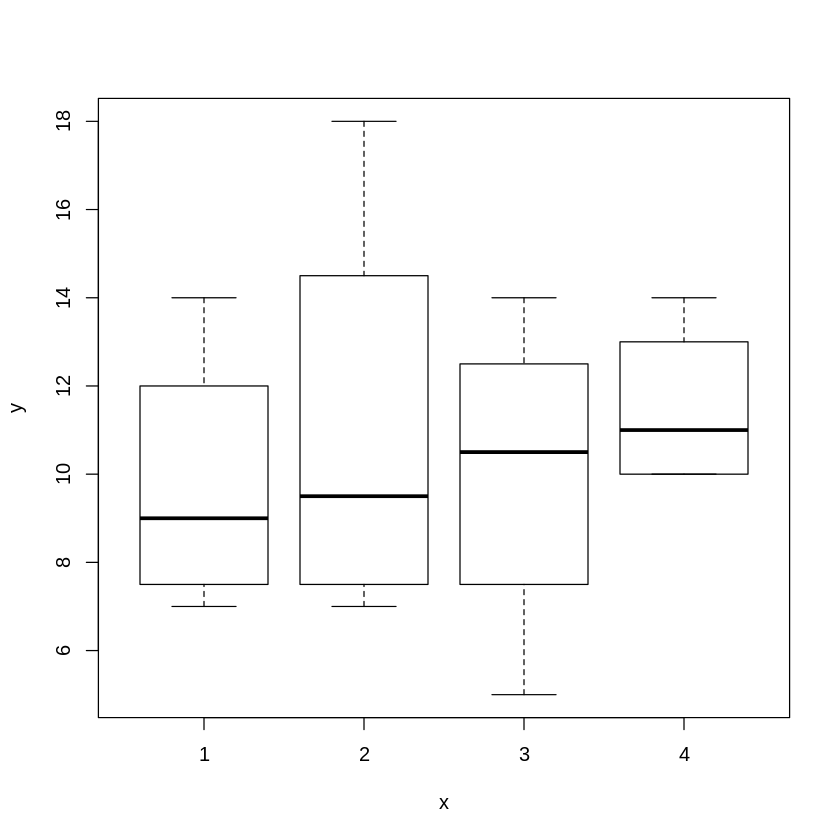

In [282]:
# Grafiquemos
dataAnova$orden<- factor(dataAnova$orden)
with(dataAnova, plot(orden, respuesta))

A partir del grafico de cajas, se puede apreciar una dispersión mayor en el segundo orden de ensamblaje, además, se aprecia un aumento del tiempo a medida que se aumenta el orden, esto debido a la fatiga acumulada en los operarios.

In [283]:
# Separemos los datos:
attach(dataAnova)

The following object is masked from data:

    respuesta


The following object is masked from dataAnova2:

    respuesta


The following objects are masked from dataAnova (pos = 5):

    orden, respuesta


The following objects are masked from dataAnova (pos = 6):

    orden, respuesta




In [284]:
summary(aov(respuesta~orden))

            Df Sum Sq Mean Sq F value Pr(>F)
orden        3   8.19   2.729    0.21  0.887
Residuals   12 155.75  12.979               

In [285]:
m.aov<-lm(respuesta~orden,data=dataAnova)
summary(m.aov)


Call:
lm(formula = respuesta ~ orden, data = dataAnova)

Residuals:
   Min     1Q Median     3Q    Max 
-5.000 -2.000  0.000  1.375  7.000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.750      1.801   5.413 0.000157 ***
orden2         1.250      2.547   0.491 0.632500    
orden3         0.250      2.547   0.098 0.923444    
orden4         1.750      2.547   0.687 0.505169    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.603 on 12 degrees of freedom
Multiple R-squared:  0.04994,	Adjusted R-squared:  -0.1876 
F-statistic: 0.2103 on 3 and 12 DF,  p-value: 0.8873


A partir de estas pruebas, se aprecia que el orden en que se realiza el ensamblaje no es estadísticamente significativo, por lo tanto, el tiempo empleado a partir del orden es estadísticamente igual en los cuatro casos.

In [286]:
aov.m<-aov(m.aov)
summary(aov.m)

            Df Sum Sq Mean Sq F value Pr(>F)
orden        3   8.19   2.729    0.21  0.887
Residuals   12 155.75  12.979               

In [287]:
tk.aov.m<-TukeyHSD(aov.m)
tk.aov.m

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = m.aov)

$orden
     diff       lwr      upr     p adj
2-1  1.25 -6.313175 8.813175 0.9596876
3-1  0.25 -7.313175 7.813175 0.9996414
4-1  1.75 -5.813175 9.313175 0.9000959
3-2 -1.00 -8.563175 6.563175 0.9785338
4-2  0.50 -7.063175 8.063175 0.9971699
4-3  1.50 -6.063175 9.063175 0.9335508


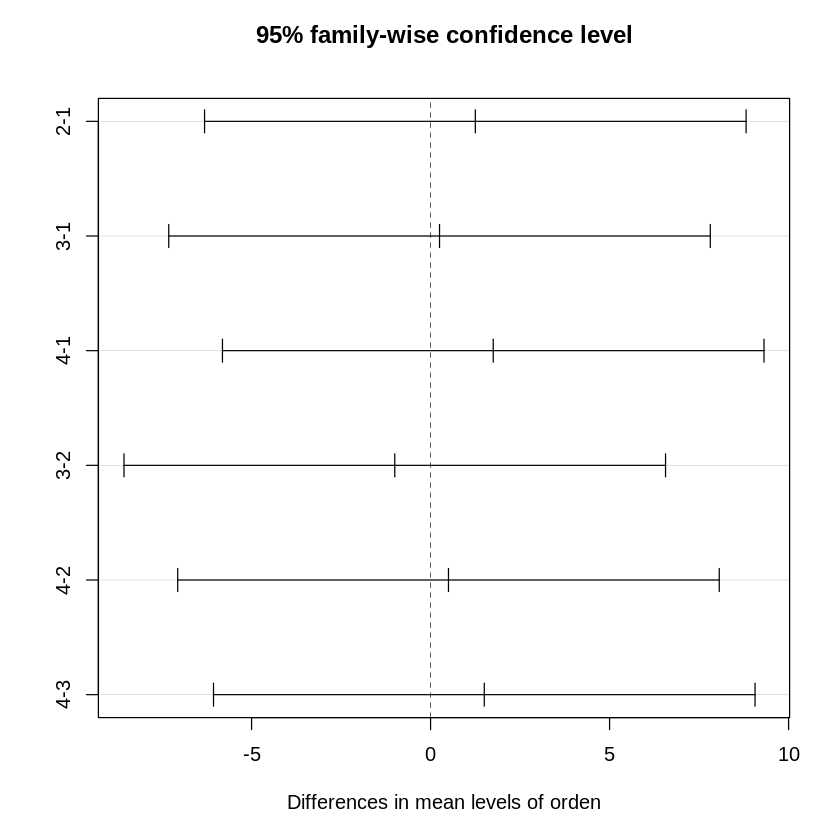

In [288]:
plot(tk.aov.m)

Se observa que no existen diferencias

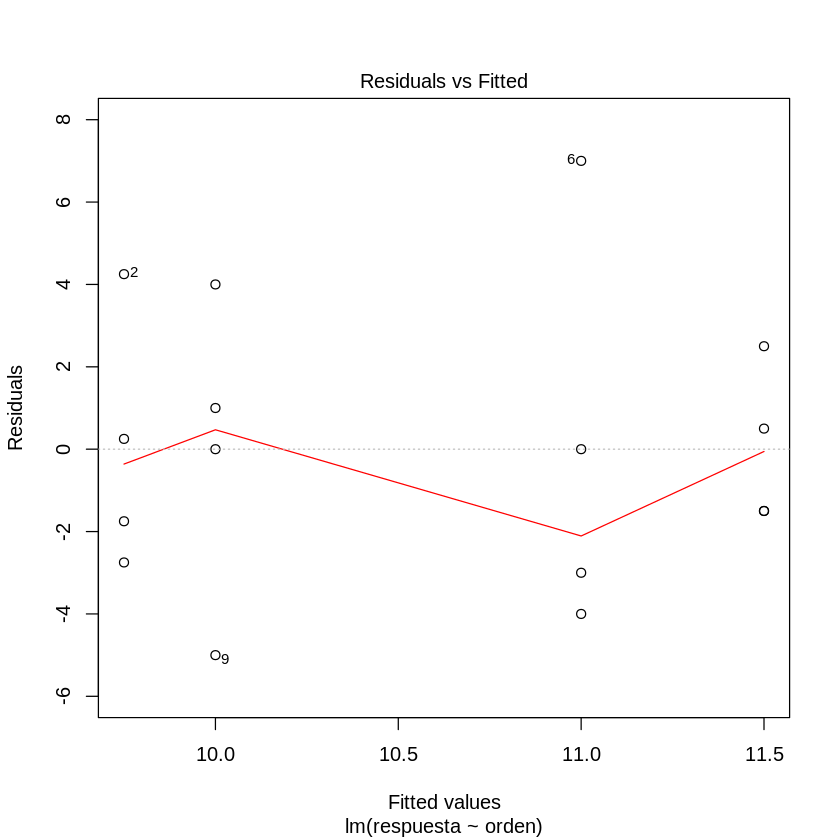

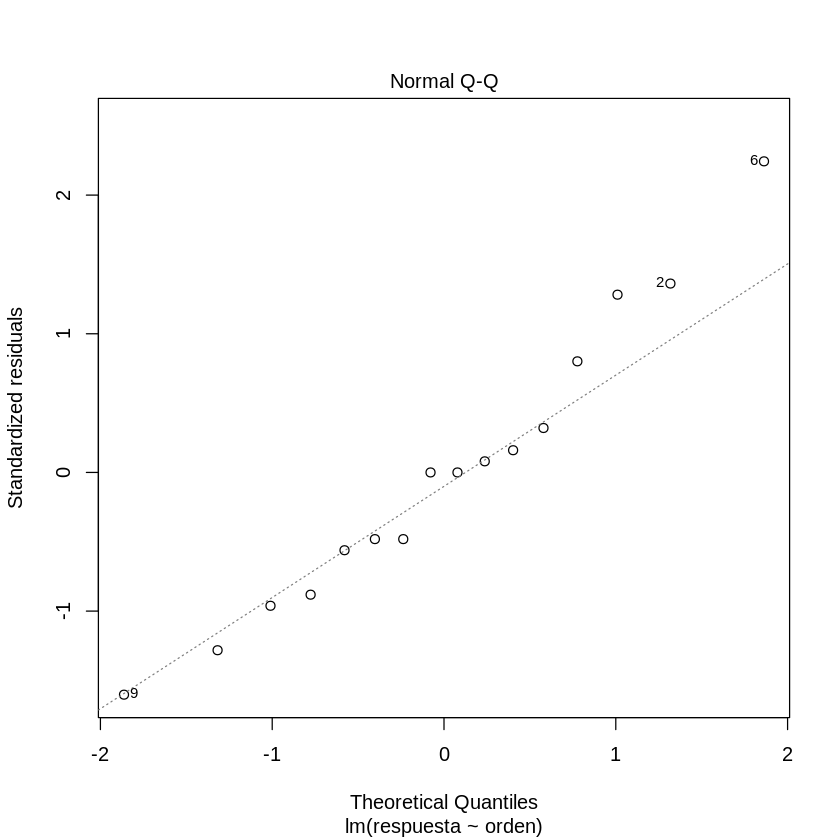

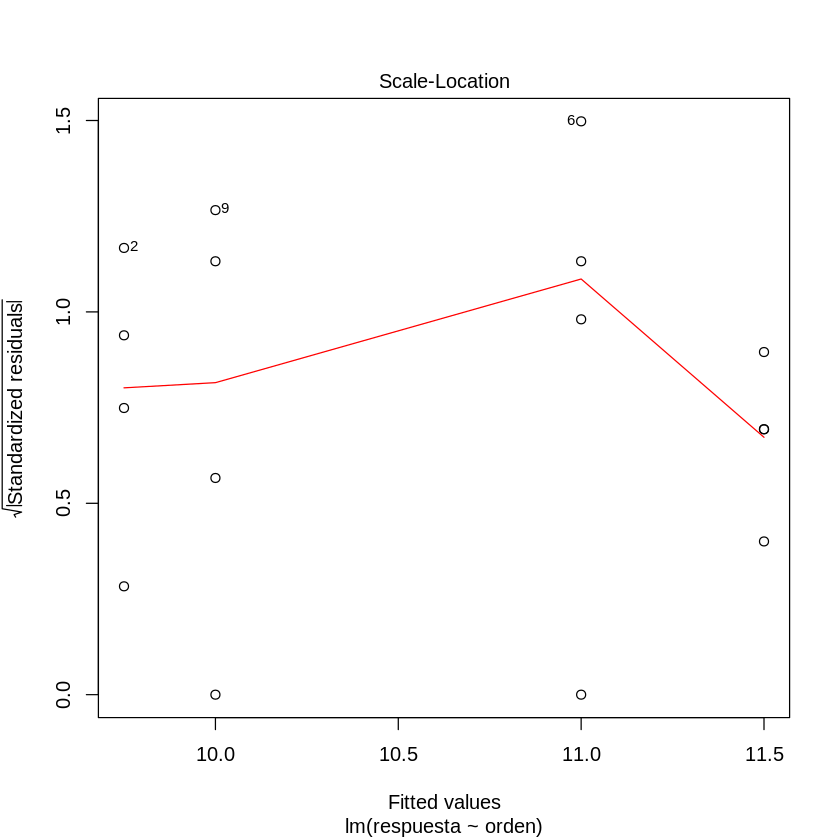

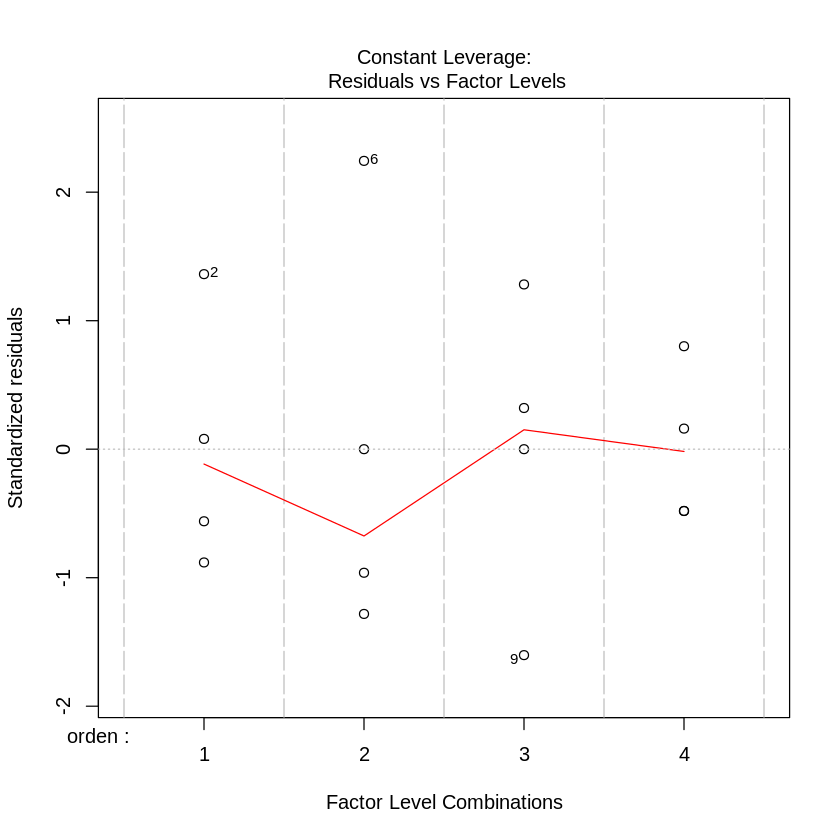

In [289]:
plot(m.aov)

### Anova de un factor (Efectos Aleatorios)

Para el ANOVA de efectos aleatorios, se usará el factor "Operario", debido a qué existe un efecto aleatorio que no podemos controlar, como lo es su habilidad a la hora de realizar un montaje.

In [290]:
dataAnova2<-data.frame(#Variables continuas
                operario=data$Operario,
                respuesta = data$respuesta)

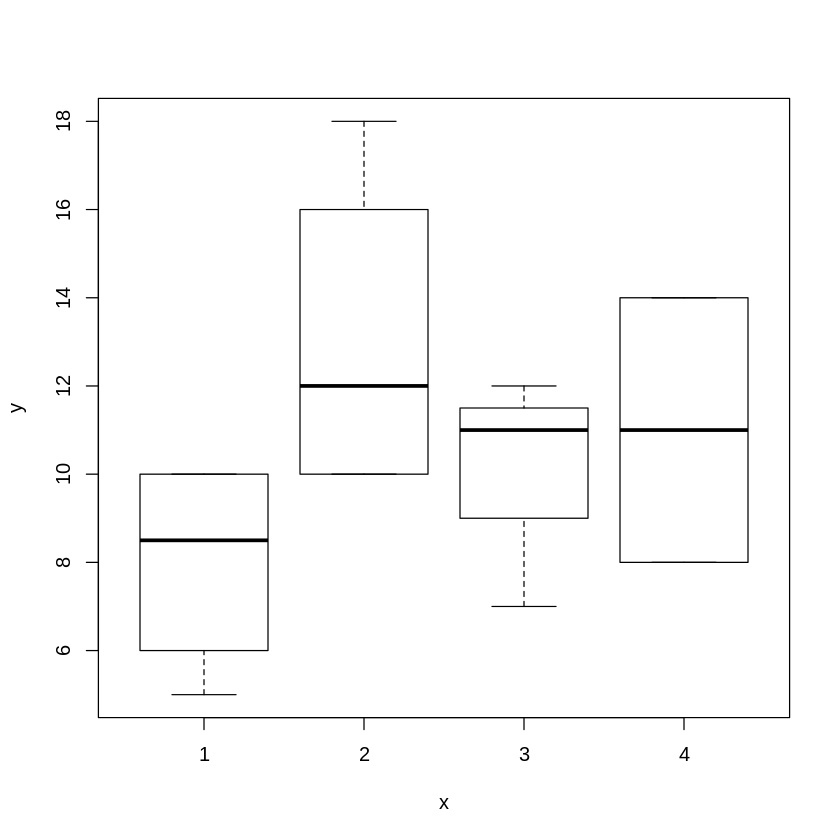

In [291]:
# Grafiquemos
dataAnova2$operario<- factor(dataAnova2$operario)
with(dataAnova2, plot(operario, respuesta))

A gran escala, el primer operario tiene un mejor tiempo de respuesta frente a los otros dos.

In [292]:
# Separemos los datos:
attach(dataAnova2)

The following object is masked from dataAnova (pos = 3):

    respuesta


The following object is masked from data:

    respuesta


The following objects are masked from dataAnova2 (pos = 5):

    operario, respuesta


The following object is masked from dataAnova (pos = 6):

    respuesta


The following object is masked from dataAnova (pos = 7):

    respuesta




In [293]:
summary(aov(respuesta~operario))

            Df Sum Sq Mean Sq F value Pr(>F)
operario     3  51.19  17.063   1.816  0.198
Residuals   12 112.75   9.396               

In [294]:
m2.aov<-lm(respuesta~operario,data=dataAnova2)
summary(m2.aov)


Call:
lm(formula = respuesta ~ operario, data = dataAnova2)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.25  -3.00   0.75   2.00   5.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.000      1.533   5.220 0.000215 ***
operario2      5.000      2.167   2.307 0.039703 *  
operario3      2.250      2.167   1.038 0.319699    
operario4      3.000      2.167   1.384 0.191528    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.065 on 12 degrees of freedom
Multiple R-squared:  0.3122,	Adjusted R-squared:  0.1403 
F-statistic: 1.816 on 3 and 12 DF,  p-value: 0.1979


El único que presenta diferencias significativas es el operario2, el resto estadísticamente hablando emplean el mismo tiempo de respuesta.

In [295]:
aov.m2<-aov(m2.aov)
summary(aov.m2)

            Df Sum Sq Mean Sq F value Pr(>F)
operario     3  51.19  17.063   1.816  0.198
Residuals   12 112.75   9.396               

In [296]:
tk.aov.m2<-TukeyHSD(aov.m2)
tk.aov.m2

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = m2.aov)

$operario
     diff       lwr       upr     p adj
2-1  5.00 -1.434998 11.434998 0.1508965
3-1  2.25 -4.184998  8.684998 0.7312706
4-1  3.00 -3.434998  9.434998 0.5316530
3-2 -2.75 -9.184998  3.684998 0.5982186
4-2 -2.00 -8.434998  4.434998 0.7934612
4-3  0.75 -5.684998  7.184998 0.9850640


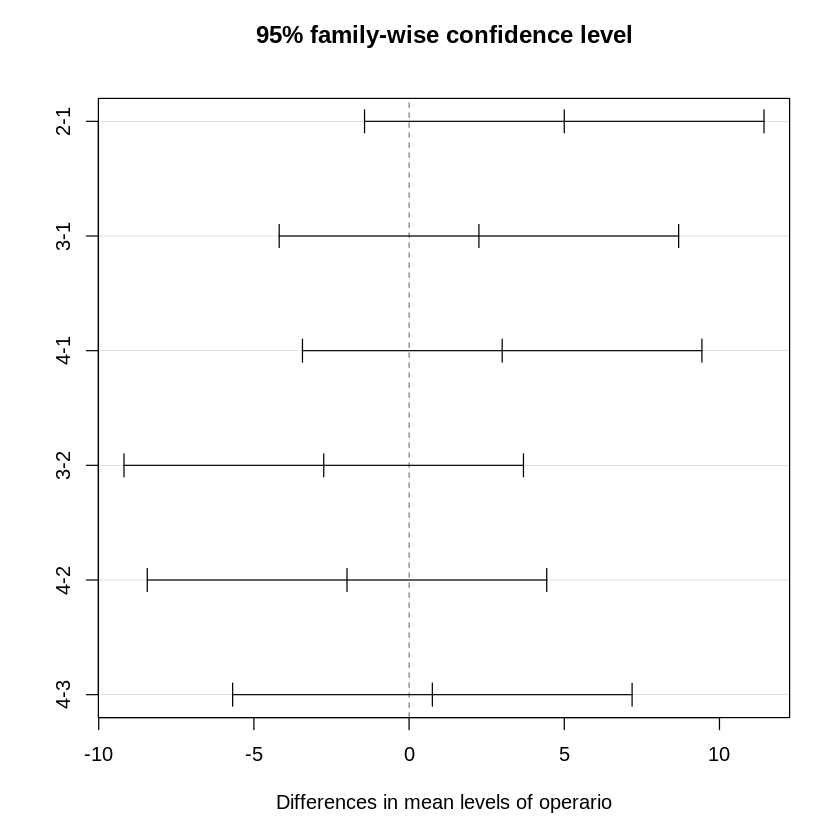

In [297]:
plot(tk.aov.m2)

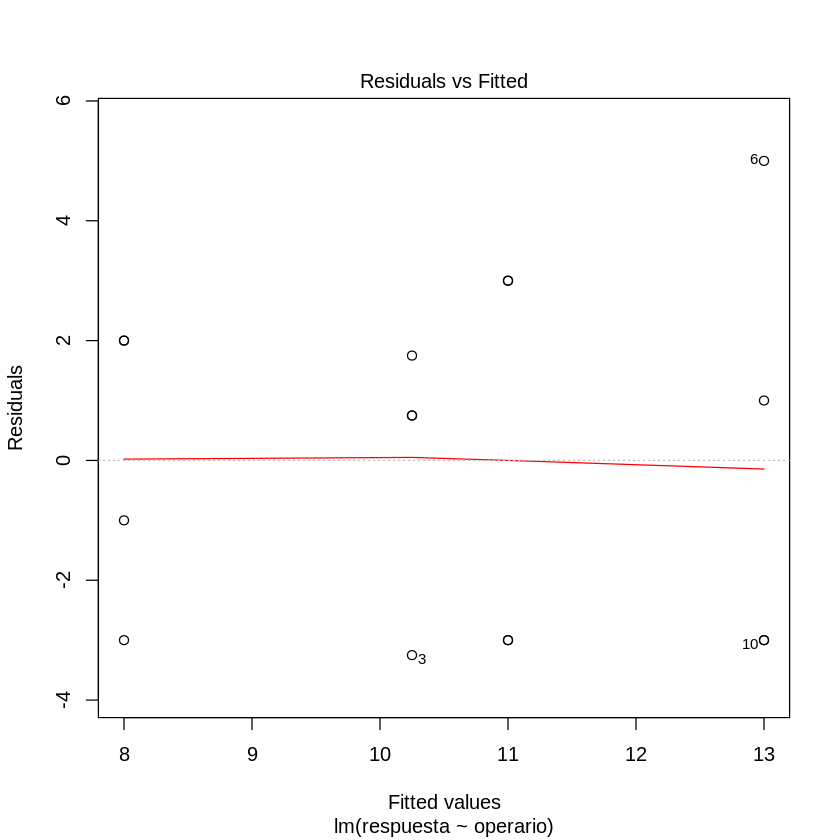

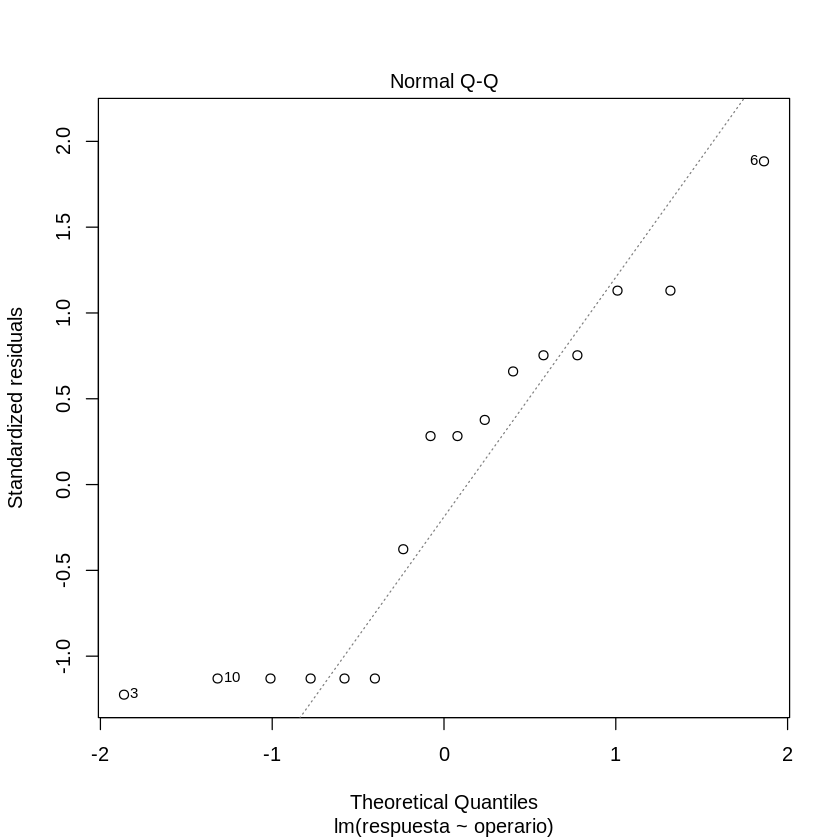

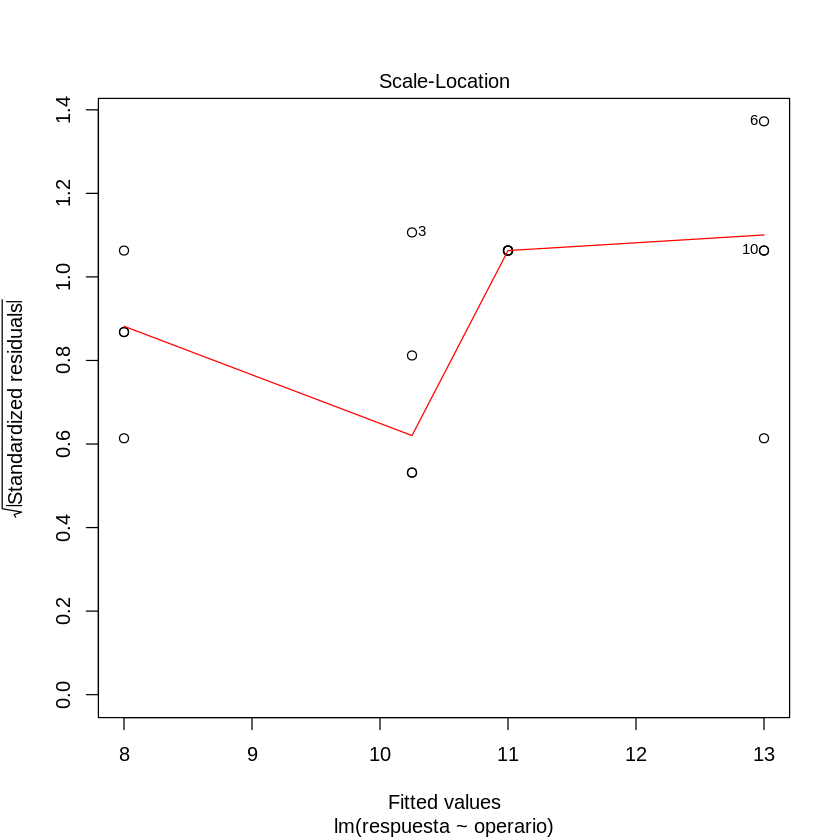

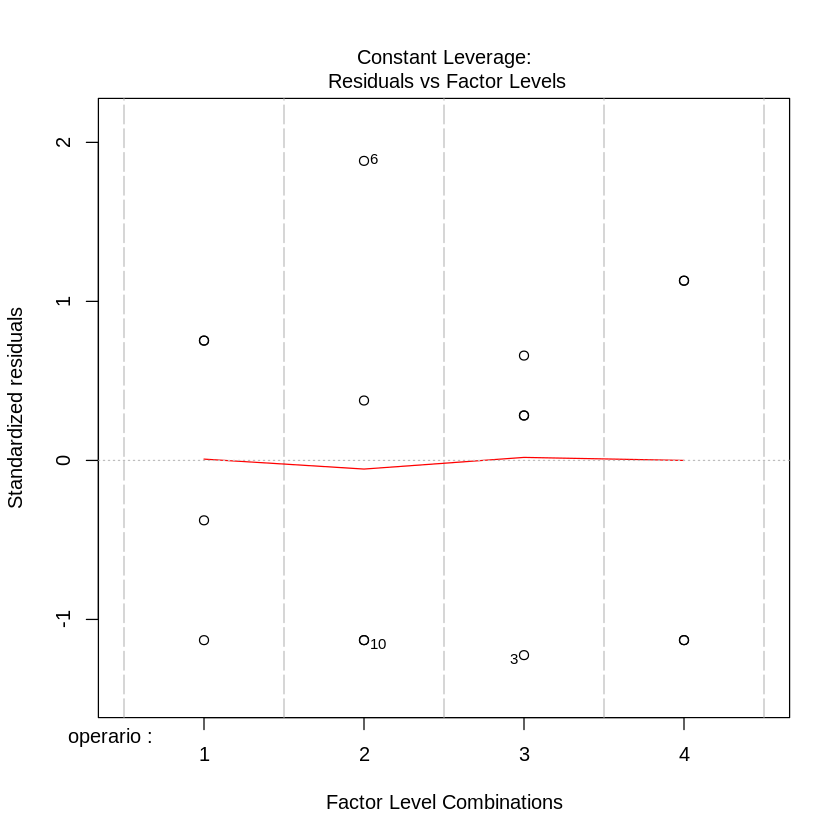

In [298]:
plot(m2.aov)

### Diseño por bloques

In [299]:
dataBloque<-data.frame(#Variables continuas
                metodo=data$Metodo,
                operario = data$Operario,
                respuesta = data$respuesta)

In [300]:
dataBloque$operario<- factor(dataBloque$operario)

In [301]:
test <- aov(respuesta~operario+metodo, data=dataBloque)
summary(test)

            Df Sum Sq Mean Sq F value  Pr(>F)   
operario     3  51.19  17.063   5.472 0.02038 * 
metodo       3  84.69  28.229   9.053 0.00442 **
Residuals    9  28.06   3.118                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Al analizar el resultado, nos indica que con el factor método existen diferencias estadísticamente significativas, lo cual indica que la variación de la respuesta sí es causada por este. Por otro lado, el nivel de significancia del factor operario es menor a 0.05, lo cual indica que también el resultado de la respuesta influye gracias a este factor.

Con esto, se puede deducir que el tiempo de respuesta tiene que ver tanto con el método que se emplee como por la persona que lo ejecute.

In [302]:
summary(lm(respuesta~operario+metodo, data=dataBloque))


Call:
lm(formula = respuesta ~ operario + metodo, data = dataBloque)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9375 -0.7500  0.0625  0.3125  3.0625 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    4.937      1.168   4.227  0.00222 **
operario2      5.000      1.249   4.004  0.00309 **
operario3      2.250      1.249   1.802  0.10506   
operario4      3.000      1.249   2.403  0.03972 * 
metodoB        1.750      1.249   1.402  0.19458   
metodoC        5.750      1.249   4.605  0.00128 **
metodoD        4.750      1.249   3.804  0.00419 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.766 on 9 degrees of freedom
Multiple R-squared:  0.8288,	Adjusted R-squared:  0.7147 
F-statistic: 7.263 on 6 and 9 DF,  p-value: 0.0047


Se puede apreciar que el operario 2 tiene un tiempo de respuesta de cinco unidades, lo cual indica que en promedio se demora 5 minutos más que el primer operario. De igual manera, el cuarto operario demora 3 minutos más que el primero. 

Lo que nos sugiere el modelo es que el tiempo de respuesta de los operarios estadísticamente se puede interpretar como:
 
\begin{equation}
Operario1 = Operario3 ≠ Opearario2 ≠ Operario4
\end{equation}

En cuanto a los métodos, se puede apreciar que se obtuvo un tiempo de respuesta diferente estadísticamente hablando en los metodos C y D, por lo tanto, el tiempo de respuesta en los métodos se puede definir como:

\begin{equation}
MetodoA = MetodoB ≠ MetodoC ≠ MetodoD
\end{equation}



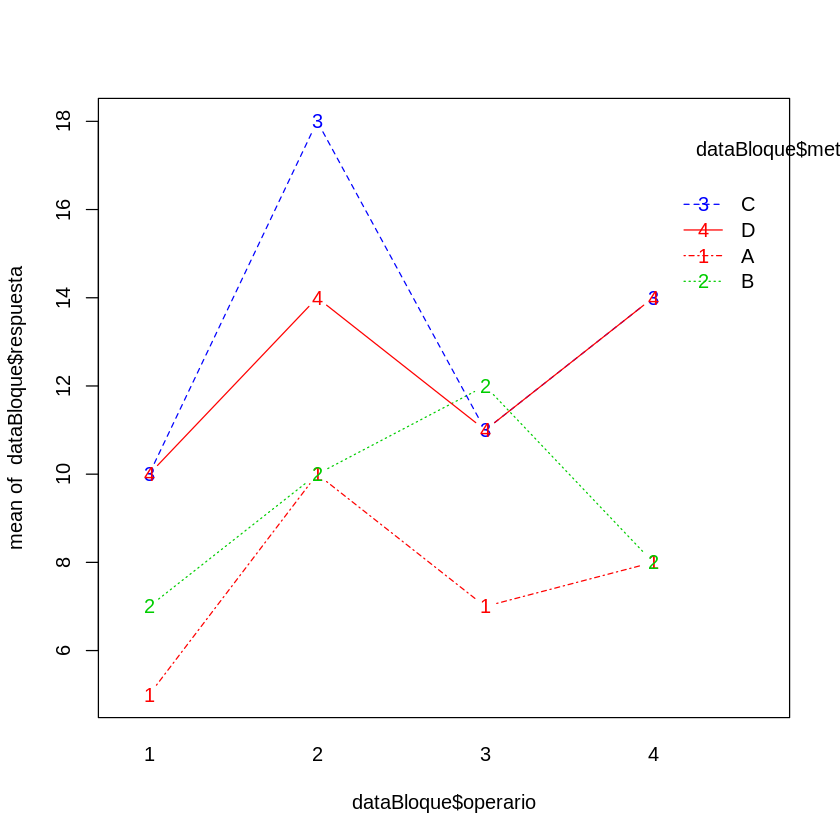

In [303]:
interaction.plot(dataBloque$operario, dataBloque$metodo, dataBloque$respuesta, type="b", col=c(2:4))

Observando la interacción, se puede comprobar lo anteriormente planteado.

In [304]:
summary(lm(respuesta~metodo:operario, data=dataBloque))


Call:
lm(formula = respuesta ~ metodo:operario, data = dataBloque)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)        1.400e+01         NA      NA       NA
metodoA:operario1 -9.000e+00         NA      NA       NA
metodoB:operario1 -7.000e+00         NA      NA       NA
metodoC:operario1 -4.000e+00         NA      NA       NA
metodoD:operario1 -4.000e+00         NA      NA       NA
metodoA:operario2 -4.000e+00         NA      NA       NA
metodoB:operario2 -4.000e+00         NA      NA       NA
metodoC:operario2  4.000e+00         NA      NA       NA
metodoD:operario2  4.475e-15         NA      NA       NA
metodoA:operario3 -7.000e+00         NA      NA       NA
metodoB:operario3 -2.000e+00         NA      NA       NA
metodoC:operario3 -3.000e+00         NA      NA       NA
metodoD:operario3 -3.000e+00         NA      NA       NA
metodoA:op

### Cuadrados Latinos

Se comenzará por un diseño de Cuadrados Latinos con el fin de analizar los tres factores

In [305]:
# Convirtamos en factor los número de Material y Operario
attach(data)
Orden<-as.factor(Orden)
Operario<-as.factor(Operario)
is.factor(Metodo)

The following objects are masked _by_ .GlobalEnv:

    Operario, Orden


The following object is masked from dataAnova2 (pos = 3):

    respuesta


The following object is masked from dataAnova (pos = 4):

    respuesta


The following objects are masked from data (pos = 5):

    Metodo, Operario, Orden, respuesta


The following object is masked from dataAnova2 (pos = 6):

    respuesta


The following object is masked from dataAnova (pos = 7):

    respuesta


The following object is masked from dataAnova (pos = 8):

    respuesta




[1] TRUE

In [306]:
# El modelo
model1<-aov(respuesta~Orden+Operario+Metodo)
summary(model1)

            Df Sum Sq Mean Sq F value Pr(>F)  
Orden        3   8.19   2.729   0.824 0.5268  
Operario     3  51.19  17.063   5.151 0.0425 *
Metodo       3  84.69  28.229   8.522 0.0139 *
Residuals    6  19.87   3.312                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

A partir de esto, se pueden inferir diferentes cosas. Por un lado, el orden no aporta de manera significativa al tiempo de respuesta que se tiene en el ensamblaje, cabe destacar, que en el enunciado se afirma que el último en ensamblar contribuye en una demora, no obstante, de los tres factores es el que menos contribuye.

En cuanto al operario, se puede decir que en cierta medida aporta al tiempo de respuesta, debido a que la habilidad y experiencia de cada uno es diferente, no obstante, no se puede hacer una afirmación en cuanto a su influencia. Del mismo modo, los resultado muestran que el factor método es el que más influye en el tiempo de respuesta, sin embargo, no se obtiene un valor con el cual se pueda afirmar su gran influencia.

In [307]:
# Las tablas de medias
model.tables(model1, "mean")

Tables of means
Grand mean
        
10.5625 

 Orden 
Orden
    1     2     3     4 
 9.75 11.00 10.00 11.50 

 Operario 
Operario
    1     2     3     4 
 8.00 13.00 10.25 11.00 

 Metodo 
Metodo
    A     B     C     D 
 7.50  9.25 13.25 12.25 

Con esta tabla de medias, se pueden apreciar las variables que mejor tiempo de respuesta tienen. En cuanto al orden, el primero en ensamblar es el que mejor resultados obtiene, el mejor operario es el primero (se podría decir que dada a su experiencia y habilidad), y el mejor método que se ajusta al problema es el A.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = respuesta ~ Orden + Operario + Metodo)

$Orden
     diff       lwr      upr     p adj
2-1  1.25 -3.205063 5.705063 0.7701742
3-1  0.25 -4.205063 4.705063 0.9971147
4-1  1.75 -2.705063 6.205063 0.5633250
3-2 -1.00 -5.455063 3.455063 0.8622578
4-2  0.50 -3.955063 4.955063 0.9783068
4-3  1.50 -2.955063 5.955063 0.6672899

$Operario
     diff        lwr      upr     p adj
2-1  5.00  0.5449375 9.455063 0.0309816
3-1  2.25 -2.2050625 6.705063 0.3787882
4-1  3.00 -1.4550625 7.455063 0.1926012
3-2 -2.75 -7.2050625 1.705063 0.2427796
4-2 -2.00 -6.4550625 2.455063 0.4656798
4-3  0.75 -3.7050625 5.205063 0.9337178

$Metodo
     diff        lwr       upr     p adj
B-A  1.75 -2.7050625  6.205063 0.5633250
C-A  5.75  1.2949375 10.205063 0.0166044
D-A  4.75  0.2949375  9.205063 0.0384916
C-B  4.00 -0.4550625  8.455063 0.0756461
D-B  3.00 -1.4550625  7.455063 0.1926012
D-C -1.00 -5.4550625  3.455063 0.862257

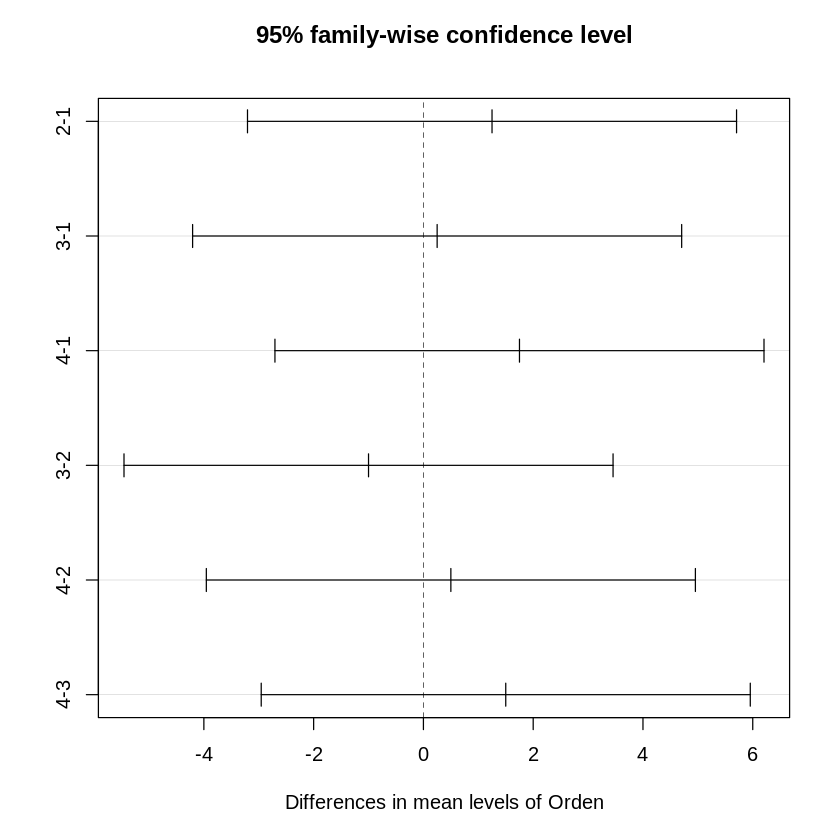

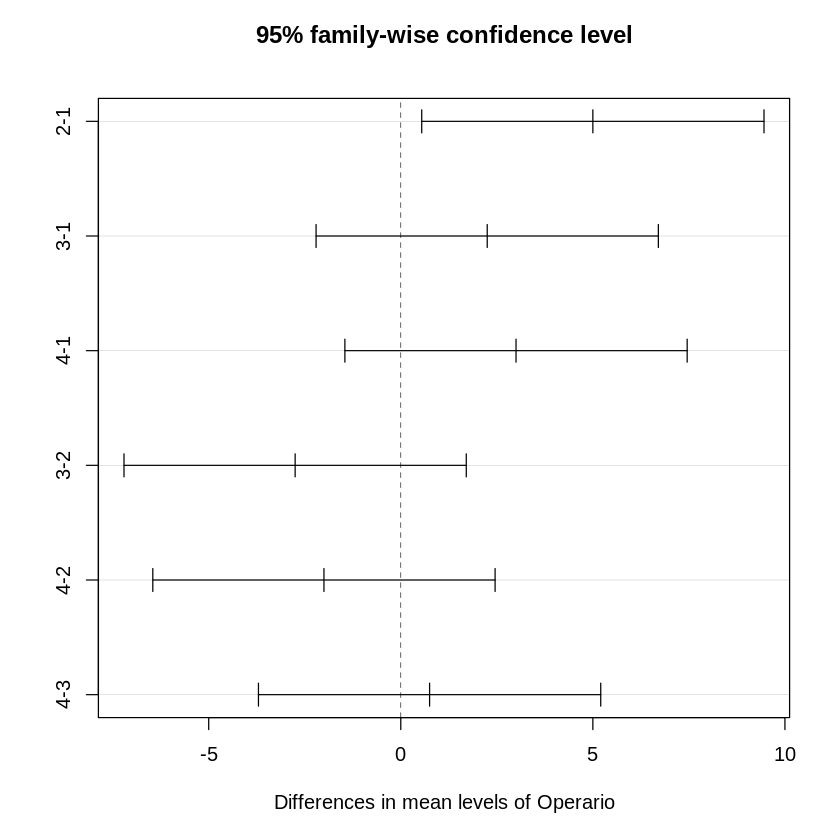

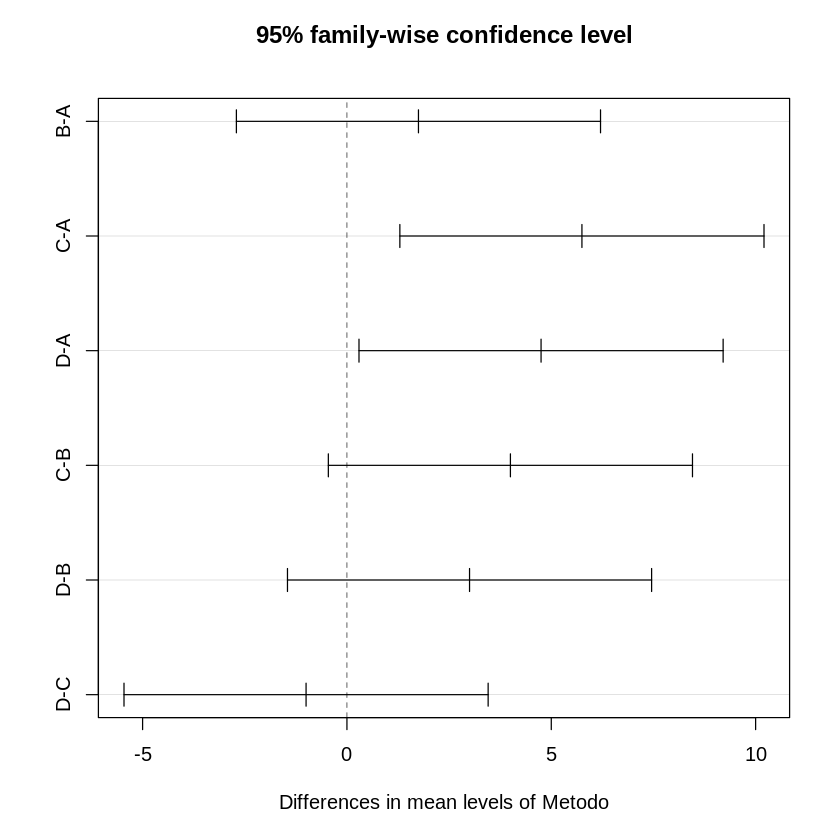

In [308]:
# La prueba de Tukey
TukeyHSD(model1)
plot(TukeyHSD(model1))

<p align="justify">Aplicada la prueba de Tukey, se puede decir que el Orden de ensamblaje no causa una diferencia. En cuanto a los operarios, se llega a notar una diferencia entre el operario 1 y 2 (teniendo la ventaja el operario 1, dado a que entre menor tiempo de respuesta, mejores resultados), esta diferencia podría llegar a ser significativa, sin embargo, los resultados no nos permiten estar seguros de tomar una decisión correcta. Por otro lado, en los métodos existen diferencias entre el A y C, y el A y D, sin embargo, sucede lo mismo que con el factor anterior, no se puede realizar una afirmación que garantice una decisión acertada.</p>

### Conclusiones


<p align="justify">
*   Es correcto afirma que el primer ensamblaje es el que toma menos tiempo, y los que le siguen toman unos minutos más, sin embargo, no existe una diferencia estadística entre ellos, lo cual indica que el tiempo de ensamblaje en cualquier orden es el mismo.<br>
*   En cuanto a los operarios, existe una diferencia estadística entre el primero y el segundo, no obstante, se tiene un tiempo de respuesta igual con los dos restantes.<br>
*   El factor que más influye en el tiempo de respuesta es el de "Método", obteniendo mejores resultados con el método A, sin embargo, gracias a los resultados se puede decir que ninguno de los métodos presentan diferencias significativamente estadísticas.
</p>
